In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import sklearn
import scipy
import asgl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, Lasso
from optbinning.scorecard import plot_auc_roc, plot_cap, plot_ks
from scipy import stats
import regressor
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
import statsmodels.stats.proportion as proportion
from sklearn.preprocessing import OneHotEncoder
from optbinning import OptimalBinning
from optbinning import OptimalBinningSketch
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import linregress
import pingouin as pg
from varclushi import VarClusHi
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn import linear_model
from yellowbrick.model_selection import RFECV
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from stepwise_regression import step_reg
import xgboost as xgb
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV, RidgeClassifier
from sklearn.linear_model import LassoLarsIC, LassoCV, LassoLarsCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn import ensemble
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from xgboost import cv
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import statsmodels.formula.api as smf
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from scipy.stats import shapiro
import warnings

warnings.filterwarnings('ignore')

D:\Anaconda\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
df= pd.read_csv("D:\Documentos\CreditData1.csv")
df

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,0
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,1
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,0
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,0
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,12,2,0,0,1,0,0,0,...,31,0,0,1,1,1,1,0,0,0
996,997,0,30,2,0,1,0,0,0,0,...,40,0,0,1,1,3,1,1,0,0
997,998,3,12,2,0,0,0,1,0,0,...,38,0,0,1,1,2,1,0,0,0
998,999,0,45,2,0,0,0,1,0,0,...,23,0,0,0,1,2,1,1,0,1


In [3]:
df.describe()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1.577000,20.903000,2.54500,0.234000,0.103000,0.181000,0.280000,0.050000,0.097000,...,35.546000,0.186000,0.179000,0.713000,1.407000,1.904000,1.155000,0.404000,0.037000,0.300000
std,288.819436,1.257638,12.058814,1.08312,0.423584,0.304111,0.385211,0.449224,0.218054,0.296106,...,11.375469,0.389301,0.383544,0.452588,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,12.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,27.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,500.500000,1.000000,18.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,750.250000,3.000000,24.000000,4.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,42.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,1000.000000,3.000000,72.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,75.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   OBS#              1000 non-null   int64
 1   CHK_ACCT          1000 non-null   int64
 2   DURATION          1000 non-null   int64
 3   HISTORY           1000 non-null   int64
 4   NEW_CAR           1000 non-null   int64
 5   USED_CAR          1000 non-null   int64
 6   FURNITURE         1000 non-null   int64
 7   RADIO/TV          1000 non-null   int64
 8   EDUCATION         1000 non-null   int64
 9   RETRAINING        1000 non-null   int64
 10  AMOUNT            1000 non-null   int64
 11  SAV_ACCT          1000 non-null   int64
 12  EMPLOYMENT        1000 non-null   int64
 13  INSTALL_RATE      1000 non-null   int64
 14  MALE_DIV          1000 non-null   int64
 15  MALE_SINGLE       1000 non-null   int64
 16  MALE_MAR_or_WID   1000 non-null   int64
 17  CO-APPLICANT      1000 non-null   

In [5]:
df.isnull().sum()
#All variables are good, none has null data or blanck cells

OBS#                0
CHK_ACCT            0
DURATION            0
HISTORY             0
NEW_CAR             0
USED_CAR            0
FURNITURE           0
RADIO/TV            0
EDUCATION           0
RETRAINING          0
AMOUNT              0
SAV_ACCT            0
EMPLOYMENT          0
INSTALL_RATE        0
MALE_DIV            0
MALE_SINGLE         0
MALE_MAR_or_WID     0
CO-APPLICANT        0
GUARANTOR           0
PRESENT_RESIDENT    0
REAL_ESTATE         0
PROP_UNKN_NONE      0
AGE                 0
OTHER_INSTALL       0
RENT                0
OWN_RES             0
NUM_CREDITS         0
JOB                 0
NUM_DEPENDENTS      0
TELEPHONE           0
FOREIGN             0
DEFAULT             0
dtype: int64

In [6]:
df.isna().sum()

OBS#                0
CHK_ACCT            0
DURATION            0
HISTORY             0
NEW_CAR             0
USED_CAR            0
FURNITURE           0
RADIO/TV            0
EDUCATION           0
RETRAINING          0
AMOUNT              0
SAV_ACCT            0
EMPLOYMENT          0
INSTALL_RATE        0
MALE_DIV            0
MALE_SINGLE         0
MALE_MAR_or_WID     0
CO-APPLICANT        0
GUARANTOR           0
PRESENT_RESIDENT    0
REAL_ESTATE         0
PROP_UNKN_NONE      0
AGE                 0
OTHER_INSTALL       0
RENT                0
OWN_RES             0
NUM_CREDITS         0
JOB                 0
NUM_DEPENDENTS      0
TELEPHONE           0
FOREIGN             0
DEFAULT             0
dtype: int64

In [7]:
df= df.drop(columns=['OBS#'])
df.reset_index(inplace=True)
df= df.drop(columns=['index'])
df

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,0
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,1
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,0
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,0
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,0,0,1,0,0,0,1736,...,31,0,0,1,1,1,1,0,0,0
996,0,30,2,0,1,0,0,0,0,3857,...,40,0,0,1,1,3,1,1,0,0
997,3,12,2,0,0,0,1,0,0,804,...,38,0,0,1,1,2,1,0,0,0
998,0,45,2,0,0,0,1,0,0,1845,...,23,0,0,0,1,2,1,1,0,1


In [8]:
df['PRESENT_RESIDENT']= df['PRESENT_RESIDENT'].replace({1:0,2:1,3:2,4:3})
df.rename(columns={'CO-APPLICANT': 'CO_APPLICANT','RADIO/TV': 'RADIO_TV'}, inplace=True)
#df.rename(columns={'CO_APPLICANT': 'GUARANTOR','GUARANTOR': 'CO_APPLICANT'}, inplace=True)

In [9]:
def type(df,column,types):
    df[column]= df[column].astype(types)
    return

In [10]:
type(df,'CHK_ACCT',"category")
type(df,'HISTORY', "category")
type(df,'SAV_ACCT',"category")
type(df,'EMPLOYMENT',"category")
type(df,'PRESENT_RESIDENT',"category")
type(df,'JOB',"category")

type(df,'NEW_CAR',"uint8")
type(df,'USED_CAR',"uint8")
type(df,'FURNITURE',"uint8")
type(df,'RADIO_TV',"uint8")
type(df,'EDUCATION',"uint8")
type(df,'RETRAINING',"uint8")
type(df,'MALE_DIV',"uint8")
type(df,'MALE_SINGLE',"uint8")
type(df,'MALE_MAR_or_WID',"uint8")
type(df, 'CO_APPLICANT',"uint8")
type(df,'GUARANTOR',"uint8")
type(df,'REAL_ESTATE',"uint8")
type(df,'PROP_UNKN_NONE',"uint8")
type(df, 'OTHER_INSTALL',"uint8")
type(df,'RENT',"uint8")
type(df,'OWN_RES',"uint8")
type(df, 'TELEPHONE',"uint8")
type(df,'FOREIGN',"uint8")

type(df,'DEFAULT',"int64")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CHK_ACCT          1000 non-null   category
 1   DURATION          1000 non-null   int64   
 2   HISTORY           1000 non-null   category
 3   NEW_CAR           1000 non-null   uint8   
 4   USED_CAR          1000 non-null   uint8   
 5   FURNITURE         1000 non-null   uint8   
 6   RADIO_TV          1000 non-null   uint8   
 7   EDUCATION         1000 non-null   uint8   
 8   RETRAINING        1000 non-null   uint8   
 9   AMOUNT            1000 non-null   int64   
 10  SAV_ACCT          1000 non-null   category
 11  EMPLOYMENT        1000 non-null   category
 12  INSTALL_RATE      1000 non-null   int64   
 13  MALE_DIV          1000 non-null   uint8   
 14  MALE_SINGLE       1000 non-null   uint8   
 15  MALE_MAR_or_WID   1000 non-null   uint8   
 16  CO_APPLICANT      1000 no

In [12]:
stat, p_value = shapiro(df)

print(stat, p_value)

0.12489581108093262 0.0


array([[<AxesSubplot:title={'center':'DURATION'}>,
        <AxesSubplot:title={'center':'NEW_CAR'}>,
        <AxesSubplot:title={'center':'USED_CAR'}>,
        <AxesSubplot:title={'center':'FURNITURE'}>,
        <AxesSubplot:title={'center':'RADIO_TV'}>],
       [<AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'RETRAINING'}>,
        <AxesSubplot:title={'center':'AMOUNT'}>,
        <AxesSubplot:title={'center':'INSTALL_RATE'}>,
        <AxesSubplot:title={'center':'MALE_DIV'}>],
       [<AxesSubplot:title={'center':'MALE_SINGLE'}>,
        <AxesSubplot:title={'center':'MALE_MAR_or_WID'}>,
        <AxesSubplot:title={'center':'CO_APPLICANT'}>,
        <AxesSubplot:title={'center':'GUARANTOR'}>,
        <AxesSubplot:title={'center':'REAL_ESTATE'}>],
       [<AxesSubplot:title={'center':'PROP_UNKN_NONE'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'OTHER_INSTALL'}>,
        <AxesSubplot:title={'center':'RENT'}>,
   

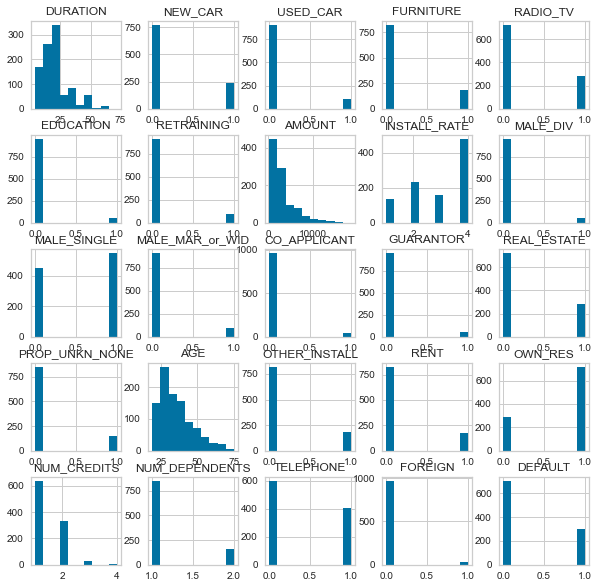

In [13]:
df.hist(figsize=(10,10))

{'whiskers': [<matplotlib.lines.Line2D at 0x1aaa45fefa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1aaa3f106a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aaa45febb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1aaa3f10dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aaa3f1f190>],
 'means': []}

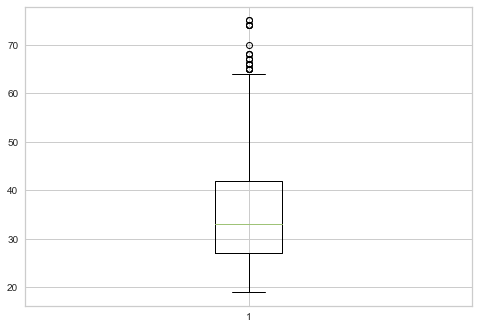

In [14]:
plt.boxplot(df['AGE'])

<AxesSubplot:xlabel='AGE', ylabel='Density'>

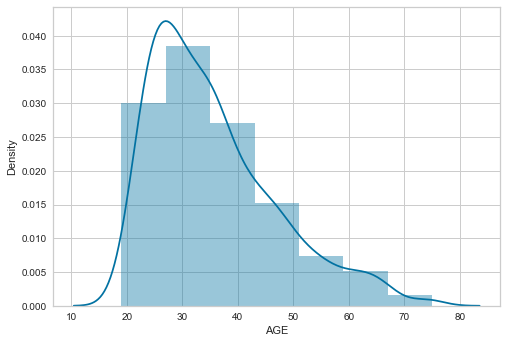

In [15]:
sns.distplot(df['AGE'],bins=7)

{'whiskers': [<matplotlib.lines.Line2D at 0x1aaa3ffe790>,
 'caps': [<matplotlib.lines.Line2D at 0x1aaa3ffeee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aaa3ffe400>],
 'medians': [<matplotlib.lines.Line2D at 0x1aaa4008670>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aaa4008a00>],
 'means': []}

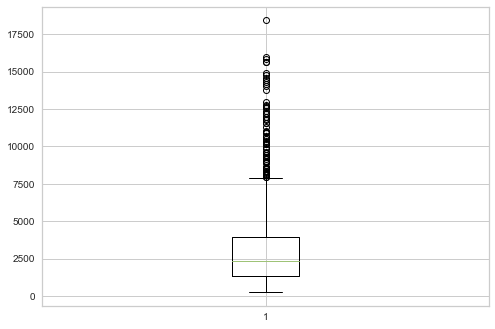

In [16]:
plt.boxplot(df['AMOUNT'])

<AxesSubplot:xlabel='AMOUNT', ylabel='Density'>

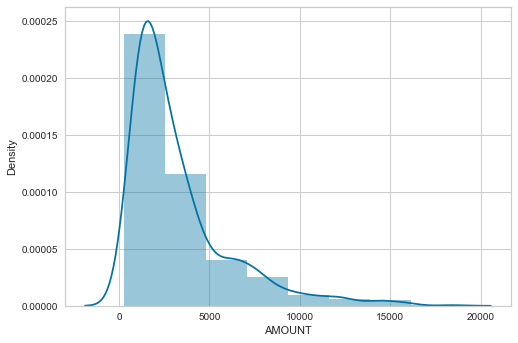

In [17]:
sns.distplot(df['AMOUNT'],bins=8)

{'whiskers': [<matplotlib.lines.Line2D at 0x1aaa40d3dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1aaa40e2520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aaa40d3a30>],
 'medians': [<matplotlib.lines.Line2D at 0x1aaa40e2c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aaa40e2fd0>],
 'means': []}

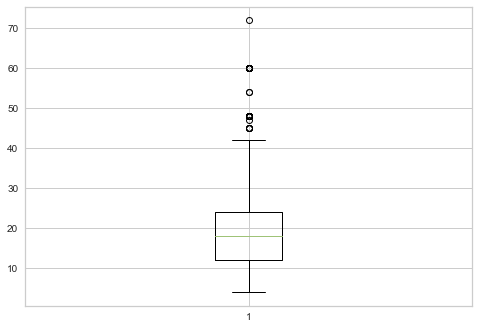

In [18]:
plt.boxplot(df['DURATION'])

<AxesSubplot:xlabel='DURATION', ylabel='Density'>

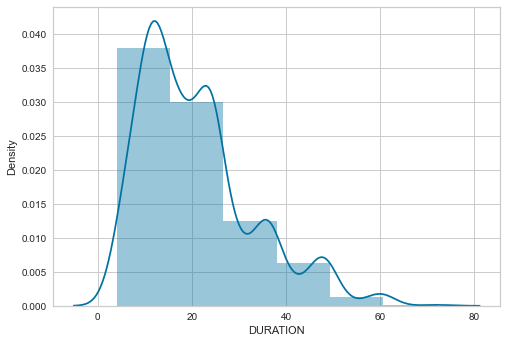

In [19]:
sns.distplot(df['DURATION'],bins=6,rug=False)

#### Podemos concluir que nuestros datos tienen una distribución normal debido a los histogramas antes vistos. Por lo tanto, los evaluaremos como datos robustos

In [20]:
def outlier(column):
    q1= df[column].quantile(0.25)
    q3= df[column].quantile(0.72)
    IQR= q3-q1
    outliers= df[column][((df[column]<(q1-3.5*IQR))|(df[column]>(q3+3.5*IQR)))]
    return outliers

In [21]:
outlier('AGE')

Series([], Name: AGE, dtype: int64)

In [22]:
outlier('AMOUNT')

18     12579
63     14421
87     12612
95     15945
236    14555
272    12169
274    11998
373    13756
374    14782
378    14318
381    12976
563    12389
615    12204
637    15653
714    14027
744    14179
763    12680
818    15857
887    15672
915    18424
917    14896
921    12749
Name: AMOUNT, dtype: int64

In [23]:
outlier('DURATION')

677    72
Name: DURATION, dtype: int64

#### Por cuestiones de politicas de credito, eliminaremos los datos en 'AGE' mayores a 69 por considerarlos de alto riesgo.

In [24]:
df= df.drop(df[df['AMOUNT']>=11998].index)
df.reset_index(inplace=True)
df= df.drop(columns=['index'])
df

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO_TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,0
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,1
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,0
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,0
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,3,12,2,0,0,1,0,0,0,1736,...,31,0,0,1,1,1,1,0,0,0
974,0,30,2,0,1,0,0,0,0,3857,...,40,0,0,1,1,3,1,1,0,0
975,3,12,2,0,0,0,1,0,0,804,...,38,0,0,1,1,2,1,0,0,0
976,0,45,2,0,0,0,1,0,0,1845,...,23,0,0,0,1,2,1,1,0,1


In [25]:
df= df.drop(df[df['DURATION']==72].index)
df.reset_index(inplace=True)
df= df.drop(columns=['index'])
df

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO_TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,0
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,1
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,0
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,0
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,3,12,2,0,0,1,0,0,0,1736,...,31,0,0,1,1,1,1,0,0,0
973,0,30,2,0,1,0,0,0,0,3857,...,40,0,0,1,1,3,1,1,0,0
974,3,12,2,0,0,0,1,0,0,804,...,38,0,0,1,1,2,1,0,0,0
975,0,45,2,0,0,0,1,0,0,1845,...,23,0,0,0,1,2,1,1,0,1


In [26]:
df= df.drop(df[df['AGE']>69].index)
df.reset_index(inplace=True)
df= df.drop(columns=['index'])
df

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO_TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,0
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,1
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,0
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,0
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,3,12,2,0,0,1,0,0,0,1736,...,31,0,0,1,1,1,1,0,0,0
966,0,30,2,0,1,0,0,0,0,3857,...,40,0,0,1,1,3,1,1,0,0
967,3,12,2,0,0,0,1,0,0,804,...,38,0,0,1,1,2,1,0,0,0
968,0,45,2,0,0,0,1,0,0,1845,...,23,0,0,0,1,2,1,1,0,1


<AxesSubplot:>

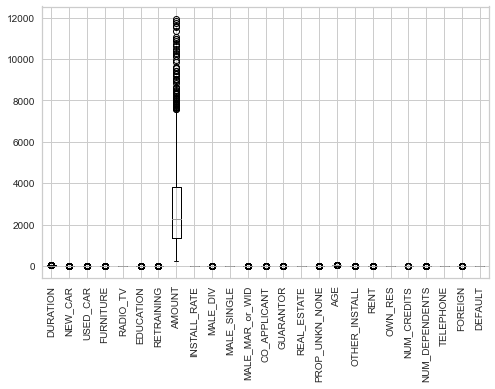

In [27]:
df.boxplot(figsize=(8,5), rot=90)

In [28]:
df['DEFAULT'].value_counts()

0    687
1    283
Name: DEFAULT, dtype: int64

In [29]:
df['DEFAULT'].value_counts(normalize=True)

0    0.708247
1    0.291753
Name: DEFAULT, dtype: float64

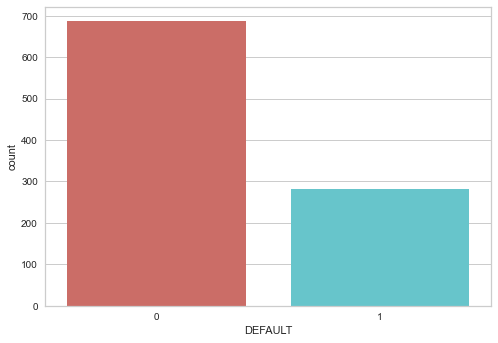

In [30]:
sns.countplot(x='DEFAULT', data=df, palette='hls')
plt.show()

In [31]:
grouped_describe = df.groupby('DEFAULT', axis=0).describe()
grouped_describe['AMOUNT']

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,2865.622999,2142.632882,250.0,1369.0,2221.0,3604.0,11760.0
1,283.0,3386.713781,2690.947940,433.0,1332.0,2384.0,4598.0,11938.0


In [32]:
df.corr()

,DURATION,NEW_CAR,USED_CAR,FURNITURE,RADIO_TV,EDUCATION,RETRAINING,AMOUNT,INSTALL_RATE,MALE_DIV,...,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
DURATION,1.000000,-0.113984,0.171956,-0.054344,-0.048302,0.006105,0.160366,0.635864,0.089199,0.005127,...,0.201616,-0.032398,0.068442,-0.059681,-0.071384,0.002604,-0.007340,0.140919,-0.150172,0.206579
NEW_CAR,-0.113984,1.000000,-0.184205,-0.260804,-0.345434,-0.126026,-0.175800,-0.078976,-0.046090,-0.011693,...,0.001923,0.061815,-0.032537,-0.005834,-0.000045,0.041515,0.108215,-0.049743,0.157043,0.096692
USED_CAR,0.171956,-0.184205,1.000000,-0.160928,-0.213148,-0.077764,-0.108476,0.317897,-0.101248,-0.029818,...,0.116160,0.038645,-0.011141,0.042520,-0.128857,-0.005451,0.051398,0.135613,-0.028708,-0.111501
FURNITURE,-0.054344,-0.260804,-0.160928,1.000000,-0.301784,-0.110101,-0.153585,-0.002545,-0.074669,0.074499,...,-0.057757,-0.119132,-0.001480,0.102552,-0.048034,-0.079745,-0.089044,-0.044286,-0.007036,0.031996
RADIO_TV,-0.048302,-0.345434,-0.213148,-0.301784,1.000000,-0.145828,-0.203423,-0.170131,0.134502,-0.070586,...,-0.100674,-0.023342,-0.030104,-0.075657,0.127987,-0.037495,-0.084173,-0.069941,-0.061129,-0.099494
EDUCATION,0.006105,-0.126026,-0.077764,-0.110101,-0.145828,1.000000,-0.074215,-0.002949,0.048460,-0.030924,...,0.162094,0.076420,0.011622,0.000100,-0.095764,-0.010216,0.030064,0.018389,-0.044627,0.069425
RETRAINING,0.160366,-0.175800,-0.108476,-0.153585,-0.203423,-0.074215,1.000000,0.095038,-0.016383,0.089617,...,-0.029823,-0.020013,0.102150,-0.015519,0.044807,0.100024,0.007200,0.083654,-0.043293,0.034617
AMOUNT,0.635864,-0.078976,0.317897,-0.002545,-0.170131,-0.002949,0.095038,1.000000,-0.286742,0.023574,...,0.186105,-0.012566,0.039781,0.006700,-0.107049,0.077608,0.057103,0.224034,-0.073591,0.101858
INSTALL_RATE,0.089199,-0.046090,-0.101248,-0.074669,0.134502,0.048460,-0.016383,-0.286742,1.000000,-0.092084,...,0.059095,0.085866,0.027851,-0.101366,0.054451,0.018754,-0.067771,0.023762,-0.077876,0.088920
MALE_DIV,0.005127,-0.011693,-0.029818,0.074499,-0.070586,-0.030924,0.089617,0.023574,-0.092084,1.000000,...,-0.038494,0.072868,-0.035018,-0.034486,0.048134,-0.023342,-0.059127,0.022368,-0.018657,0.052243


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CHK_ACCT          970 non-null    category
 1   DURATION          970 non-null    int64   
 2   HISTORY           970 non-null    category
 3   NEW_CAR           970 non-null    uint8   
 4   USED_CAR          970 non-null    uint8   
 5   FURNITURE         970 non-null    uint8   
 6   RADIO_TV          970 non-null    uint8   
 7   EDUCATION         970 non-null    uint8   
 8   RETRAINING        970 non-null    uint8   
 9   AMOUNT            970 non-null    int64   
 10  SAV_ACCT          970 non-null    category
 11  EMPLOYMENT        970 non-null    category
 12  INSTALL_RATE      970 non-null    int64   
 13  MALE_DIV          970 non-null    uint8   
 14  MALE_SINGLE       970 non-null    uint8   
 15  MALE_MAR_or_WID   970 non-null    uint8   
 16  CO_APPLICANT      970 non-

## DATA EXPLORATION

In [34]:
def contingency(column,rot=0):
    y = df['DEFAULT']
    x = df[column]
    table = pd.crosstab(x, y)
    plot = table.div(table.sum(1), axis=0).plot(kind='bar', stacked=True, legend=False, rot=rot)
    return plot

In [35]:
def graf_func(column):
    column= df[column].astype('int64')
    plot = sns.JointGrid(data=df, x=column)
    plot.plot_joint(sns.histplot)
    plot.plot_marginals(sns.boxplot)
    return plot

In [36]:
def data_tabla(column):
    grouped_describe = df[column].groupby(df['DEFAULT'], axis=0).describe(include='all')
    return grouped_describe

In [37]:
def logit(column):
    x= df[column].astype('int')
    y= df['DEFAULT']
    logit= smf.logit('y~x',data=df).fit()
    return (logit.wald_test_terms())

In [38]:
def logplot1(column, df):
    y = df['DEFAULT']
    x = df.drop(columns='DEFAULT')
    column_data = df[[column]] 
    
    log = LogisticRegression(penalty=None)
    log.fit(X=x, y=y)
    y_pred = log.predict_proba(x)[:, 1]
    
    new = pd.DataFrame(data={'Default': y_pred})
    df3 = pd.concat([column_data, new], axis=1)
    
    plot = sns.lmplot(x=column, y='Default', data=df3)
    return plot

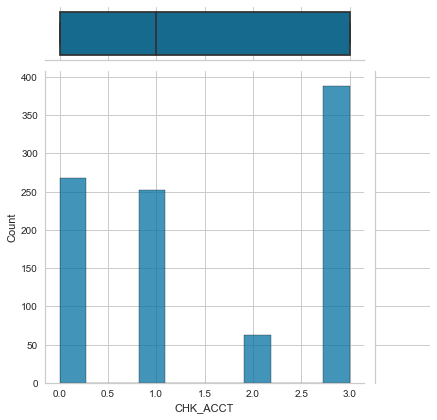

In [39]:
graf_func('CHK_ACCT')

<AxesSubplot:xlabel='CHK_ACCT'>

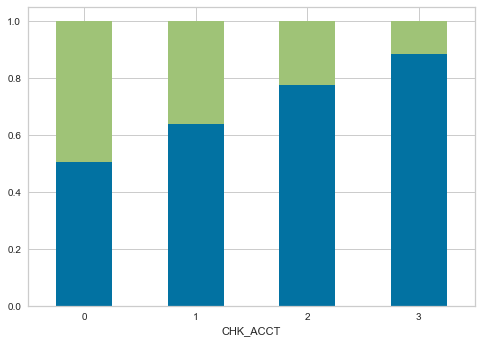

In [40]:
contingency('CHK_ACCT')

In [41]:
data_tabla('CHK_ACCT')

,count,unique,top,freq
DEFAULT,,,,
0,687,4,3,343
1,283,4,0,133


In [42]:
logit('CHK_ACCT')

Optimization terminated successfully.
         Current function value: 0.539398
         Iterations 6


<class 'statsmodels.stats.contrast.WaldTestResults'>
                              chi2                  P>chi2  df constraint
Intercept  [[0.07932389489160871]]      0.7782157465220065              1
x           [[107.43733659832935]]  3.5701702785829496e-25              1

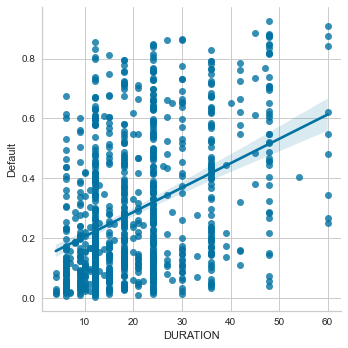

In [43]:
logplot1('DURATION',df)

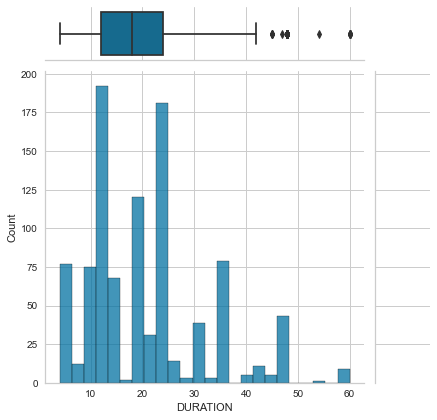

In [44]:
graf_func('DURATION')

<AxesSubplot:xlabel='DURATION'>

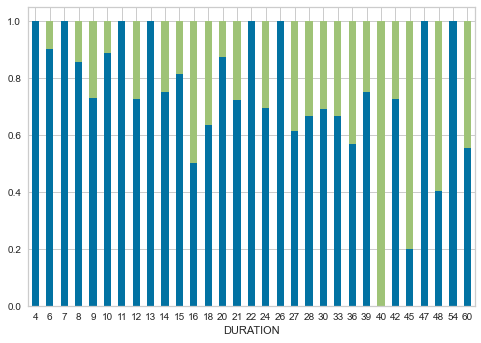

In [45]:
contingency('DURATION' )

In [46]:
data_tabla('DURATION')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,18.967977,10.703893,4.0,12.0,18.0,24.0,60.0
1,283.0,24.190813,12.498751,6.0,12.0,24.0,36.0,60.0


In [47]:
logit('DURATION')

Optimization terminated successfully.
         Current function value: 0.583128
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                  P>chi2  df constraint
Intercept  [[123.95707180575724]]   8.608603012383594e-29              1
x           [[39.06655494523789]]  4.0960105790993724e-10              1

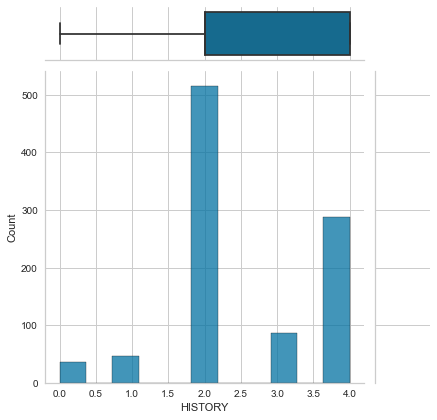

In [48]:
graf_func('HISTORY')

<AxesSubplot:xlabel='HISTORY'>

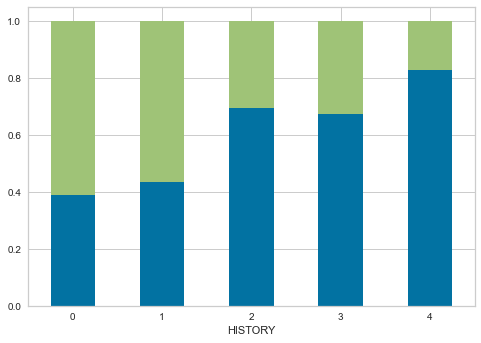

In [49]:
contingency('HISTORY')

In [50]:
data_tabla('HISTORY')

,count,unique,top,freq
DEFAULT,,,,
0,687,5,2,357
1,283,5,2,158


In [51]:
logit('HISTORY')

Optimization terminated successfully.
         Current function value: 0.579958
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                            chi2                 P>chi2  df constraint
Intercept  [[1.853860196653683]]    0.17333509730209645              1
x          [[42.67666675535496]]  6.457802595135919e-11              1

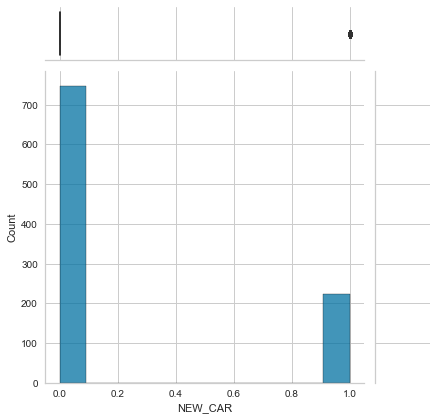

In [52]:
graf_func('NEW_CAR')

<AxesSubplot:xlabel='NEW_CAR'>

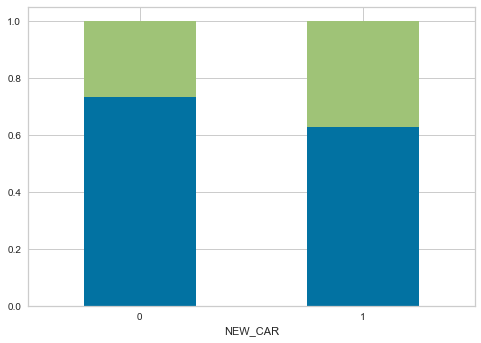

In [53]:
contingency('NEW_CAR')

In [54]:
data_tabla('NEW_CAR')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,0.203785,0.403104,0.0,0.0,0.0,0.0,1.0
1,283.0,0.293286,0.456075,0.0,0.0,0.0,1.0,1.0


In [55]:
logit('NEW_CAR')

Optimization terminated successfully.
         Current function value: 0.599185
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                P>chi2  df constraint
Intercept  [[148.25391031882685]]   4.1747245871188e-34              1
x           [[8.978273404302126]]  0.002732086893586821              1

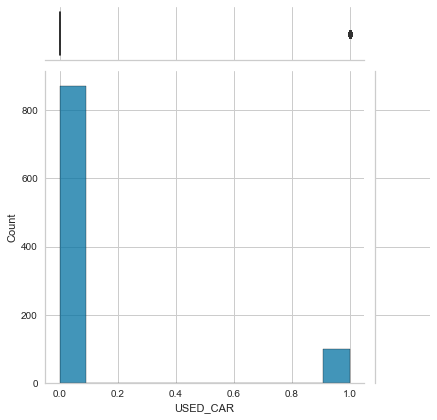

In [56]:
graf_func('USED_CAR')

<AxesSubplot:xlabel='USED_CAR'>

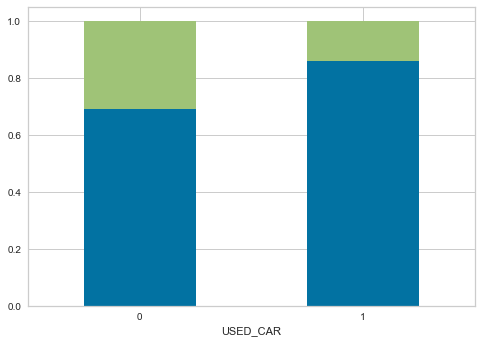

In [57]:
contingency('USED_CAR')

In [58]:
data_tabla('USED_CAR')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,0.123726,0.329509,0.0,0.0,0.0,0.0,1.0
1,283.0,0.049470,0.217231,0.0,0.0,0.0,0.0,1.0


In [59]:
logit('USED_CAR')

Optimization terminated successfully.
         Current function value: 0.596671
         Iterations 6


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                 P>chi2  df constraint
Intercept  [[120.64556956067288]]  4.568817030369174e-28              1
x          [[11.246227859801635]]  0.0007978499569013929              1

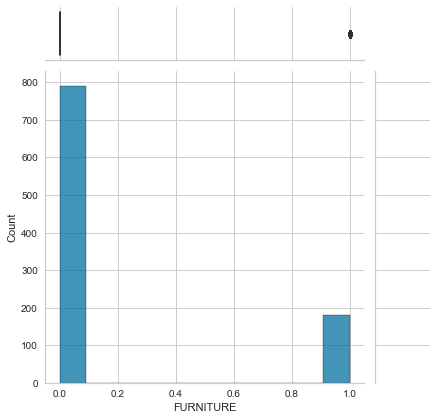

In [60]:
graf_func('FURNITURE')

<AxesSubplot:xlabel='FURNITURE'>

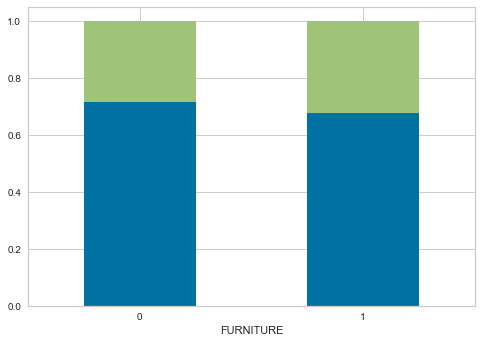

In [61]:
contingency('FURNITURE')

In [62]:
data_tabla('FURNITURE')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,0.177584,0.382440,0.0,0.0,0.0,0.0,1.0
1,283.0,0.204947,0.404378,0.0,0.0,0.0,0.0,1.0


In [63]:
logit('FURNITURE')

Optimization terminated successfully.
         Current function value: 0.603209
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                 P>chi2  df constraint
Intercept  [[136.41560578931114]]  1.618483732005395e-31              1
x          [[0.9914290212829611]]     0.3193933598604689              1

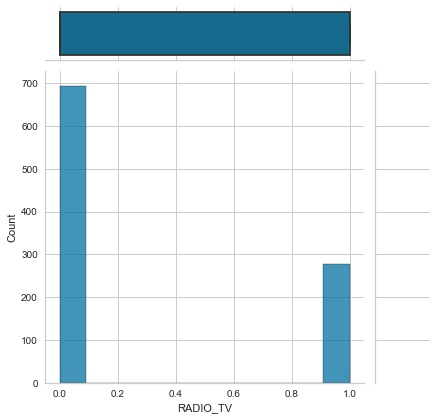

In [64]:
graf_func('RADIO_TV')

<AxesSubplot:xlabel='RADIO_TV'>

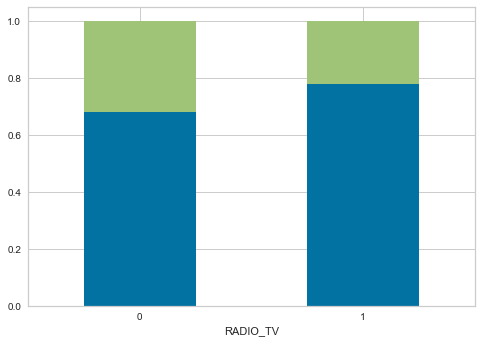

In [65]:
contingency('RADIO_TV')

In [66]:
data_tabla('RADIO_TV')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,0.314410,0.464619,0.0,0.0,0.0,1.0,1.0
1,283.0,0.215548,0.411930,0.0,0.0,0.0,0.0,1.0


In [67]:
logit('RADIO_TV')

Optimization terminated successfully.
         Current function value: 0.598588
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                            chi2                  P>chi2  df constraint
Intercept   [[85.3660197402369]]  2.4794507100266995e-20              1
x          [[9.488840176189827]]    0.002067254623200734              1

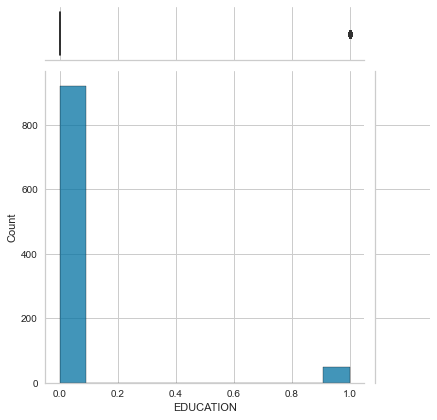

In [68]:
graf_func('EDUCATION')

<AxesSubplot:xlabel='EDUCATION'>

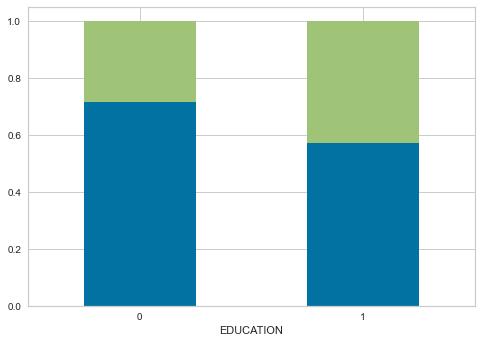

In [69]:
contingency('EDUCATION')

In [70]:
data_tabla('EDUCATION')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,0.040757,0.197871,0.0,0.0,0.0,0.0,1.0
1,283.0,0.074205,0.262568,0.0,0.0,0.0,0.0,1.0


In [71]:
logit('EDUCATION')

Optimization terminated successfully.
         Current function value: 0.601462
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                  P>chi2  df constraint
Intercept  [[159.49457589217067]]  1.4590778861657847e-36              1
x          [[4.5432641599177295]]     0.03304851471701444              1

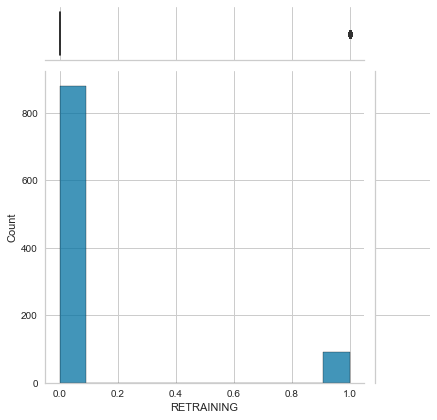

In [72]:
graf_func('RETRAINING')

<AxesSubplot:xlabel='RETRAINING'>

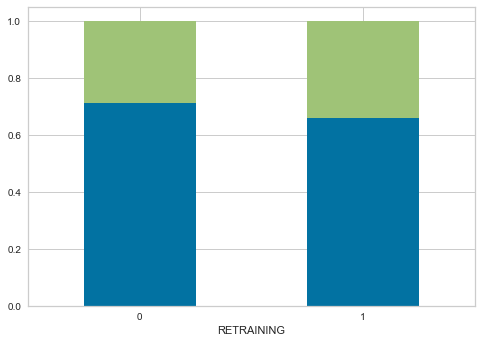

In [73]:
contingency('RETRAINING')

In [74]:
data_tabla('RETRAINING')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,0.087336,0.282533,0.0,0.0,0.0,0.0,1.0
1,283.0,0.109541,0.312870,0.0,0.0,0.0,0.0,1.0


In [75]:
logit('RETRAINING')

Optimization terminated successfully.
         Current function value: 0.603130
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2               P>chi2  df constraint
Intercept  [[149.35136074720734]]  2.4029172756811e-34              1
x           [[1.157714188860484]]  0.28194010243856416              1

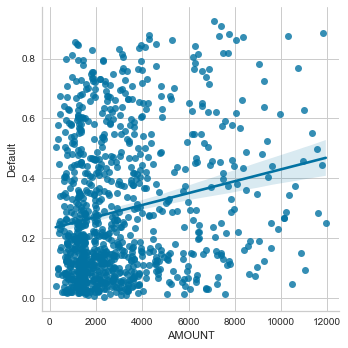

In [76]:
logplot1('AMOUNT',df)

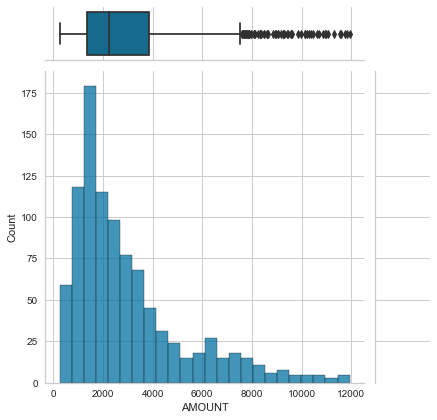

In [77]:
graf_func('AMOUNT')

In [78]:
data_tabla('AMOUNT')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,2865.622999,2142.632882,250.0,1369.0,2221.0,3604.0,11760.0
1,283.0,3386.713781,2690.947940,433.0,1332.0,2384.0,4598.0,11938.0


In [79]:
logit('AMOUNT')

Optimization terminated successfully.
         Current function value: 0.598712
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                  P>chi2  df constraint
Intercept  [[100.04764790745219]]  1.4877450330074576e-23              1
x            [[9.88233628466132]]   0.0016687292559115906              1

<AxesSubplot:xlabel='SAV_ACCT'>

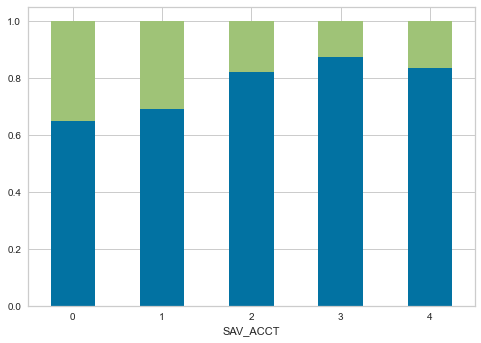

In [80]:
contingency('SAV_ACCT')

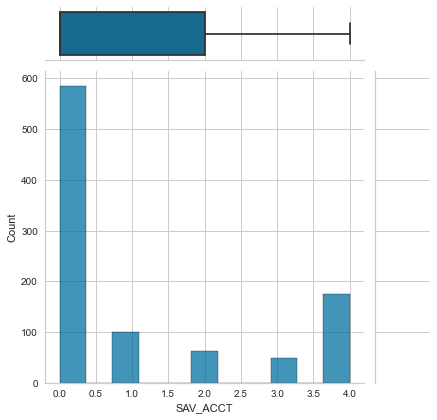

In [81]:
graf_func('SAV_ACCT')

In [82]:
data_tabla('SAV_ACCT')

,count,unique,top,freq
DEFAULT,,,,
0,687,5,0,379
1,283,5,0,206


In [83]:
logit('SAV_ACCT')

Optimization terminated successfully.
         Current function value: 0.586262
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                  P>chi2  df constraint
Intercept   [[55.34954180380802]]   1.008933835567918e-13              1
x          [[29.710263993791347]]  5.0168488591286185e-08              1

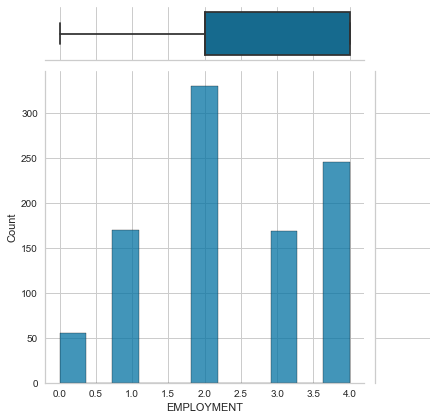

In [84]:
graf_func('EMPLOYMENT')

<AxesSubplot:xlabel='EMPLOYMENT'>

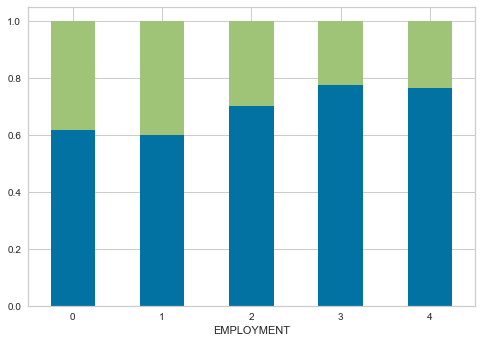

In [85]:
contingency('EMPLOYMENT')

In [86]:
data_tabla('EMPLOYMENT')

,count,unique,top,freq
DEFAULT,,,,
0,687,5,2,232
1,283,5,2,98


In [87]:
logit('EMPLOYMENT')

Optimization terminated successfully.
         Current function value: 0.595617
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                 P>chi2  df constraint
Intercept   [[4.994577798931114]]    0.02542685603547374              1
x          [[15.448403074630523]]  8.478855583355783e-05              1

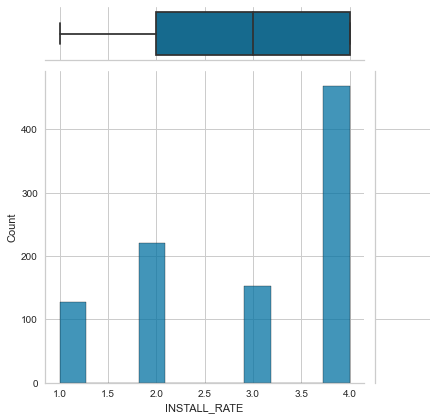

In [88]:
graf_func('INSTALL_RATE')

<AxesSubplot:xlabel='INSTALL_RATE'>

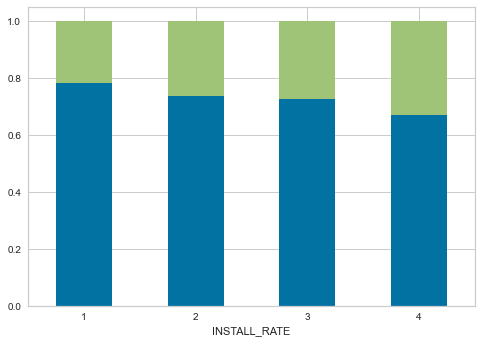

In [89]:
contingency('INSTALL_RATE')

In [90]:
data_tabla('INSTALL_RATE')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,2.927220,1.127680,1.0,2.0,3.0,4.0,4.0
1,283.0,3.144876,1.063682,1.0,2.0,4.0,4.0,4.0


In [91]:
logit('INSTALL_RATE')

Optimization terminated successfully.
         Current function value: 0.599685
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                            chi2                 P>chi2  df constraint
Intercept  [[44.82874766929636]]  2.150422320460727e-11              1
x          [[7.615645716936369]]   0.005786403556472997              1

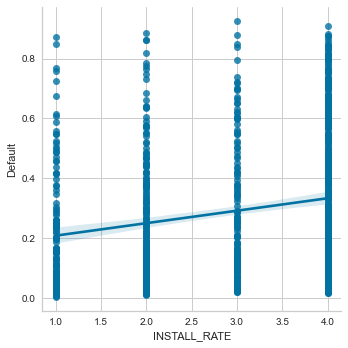

In [92]:
logplot1('INSTALL_RATE',df)

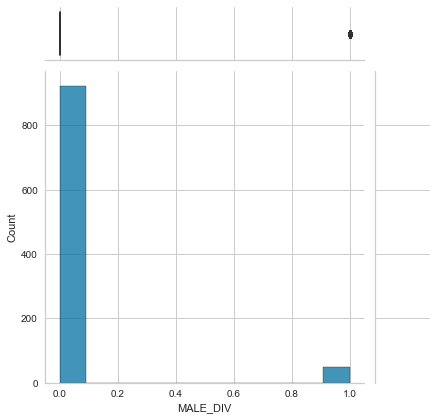

In [93]:
graf_func('MALE_DIV')

<AxesSubplot:xlabel='MALE_DIV'>

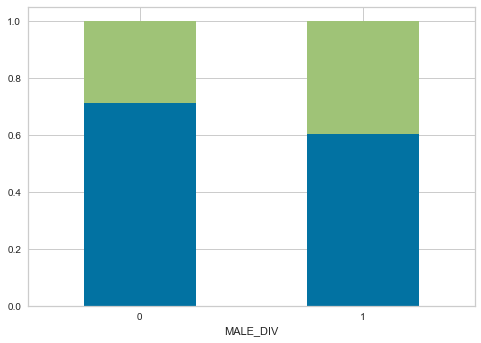

In [94]:
contingency('MALE_DIV')

In [95]:
data_tabla('MALE_DIV')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,0.042213,0.201220,0.0,0.0,0.0,0.0,1.0
1,283.0,0.067138,0.250704,0.0,0.0,0.0,0.0,1.0


In [96]:
logit('MALE_DIV')

Optimization terminated successfully.
         Current function value: 0.602422
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                  P>chi2  df constraint
Intercept  [[157.13893461224387]]  4.7729946771856004e-36              1
x           [[2.602099356694339]]     0.10672226228752835              1

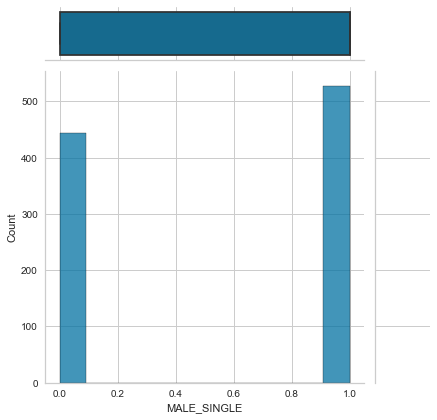

In [97]:
graf_func('MALE_SINGLE')

<AxesSubplot:xlabel='MALE_SINGLE'>

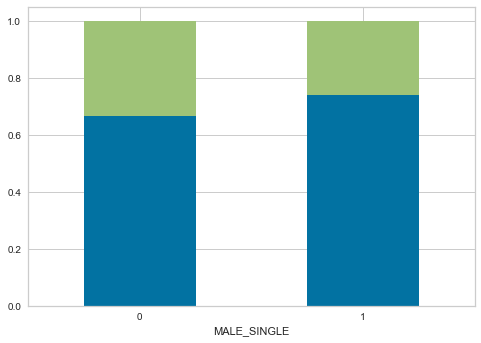

In [98]:
contingency('MALE_SINGLE')

In [99]:
data_tabla('MALE_SINGLE')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,0.569141,0.495557,0.0,0.0,1.0,1.0,1.0
1,283.0,0.480565,0.500507,0.0,0.0,0.0,1.0,1.0


In [100]:
logit('MALE_SINGLE')

Optimization terminated successfully.
         Current function value: 0.600454
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                 P>chi2  df constraint
Intercept  [[48.118341394138035]]  4.012554937316995e-12              1
x           [[6.312373447570872]]   0.011989822769184323              1

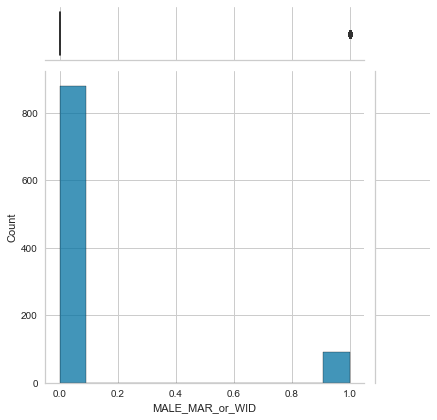

In [101]:
graf_func('MALE_MAR_or_WID')

<AxesSubplot:xlabel='MALE_MAR_or_WID'>

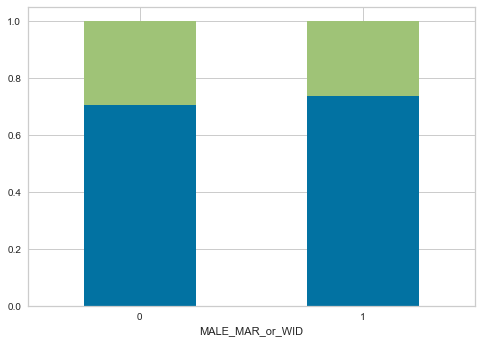

In [102]:
contingency('MALE_MAR_or_WID')

In [103]:
data_tabla('MALE_MAR_or_WID')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,0.097525,0.296888,0.0,0.0,0.0,0.0,1.0
1,283.0,0.084806,0.279086,0.0,0.0,0.0,0.0,1.0


In [104]:
logit('MALE_MAR_or_WID')

Optimization terminated successfully.
         Current function value: 0.603513
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                 P>chi2  df constraint
Intercept  [[139.19480411994894]]  3.992960178584304e-32              1
x          [[0.3808570689485347]]     0.5371449041508316              1

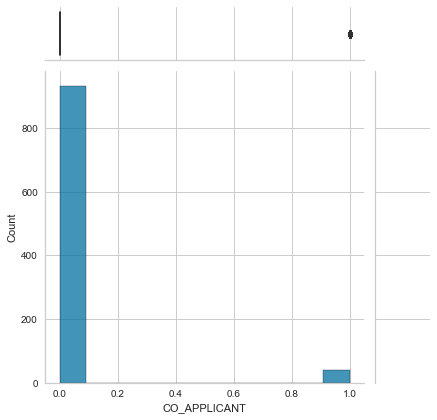

In [105]:
graf_func('CO_APPLICANT')

<AxesSubplot:xlabel='CO_APPLICANT'>

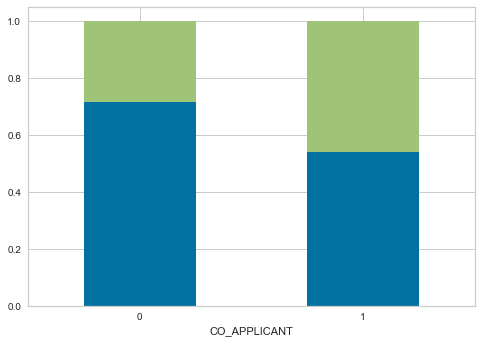

In [106]:
contingency('CO_APPLICANT')

In [107]:
data_tabla('CO_APPLICANT')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,0.030568,0.172269,0.0,0.0,0.0,0.0,1.0
1,283.0,0.063604,0.244479,0.0,0.0,0.0,0.0,1.0


In [108]:
logit('CO_APPLICANT')

Optimization terminated successfully.
         Current function value: 0.601018
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                 P>chi2  df constraint
Intercept  [[160.99689778382512]]  6.852393228360414e-37              1
x            [[5.43032283797218]]   0.019790020314397704              1

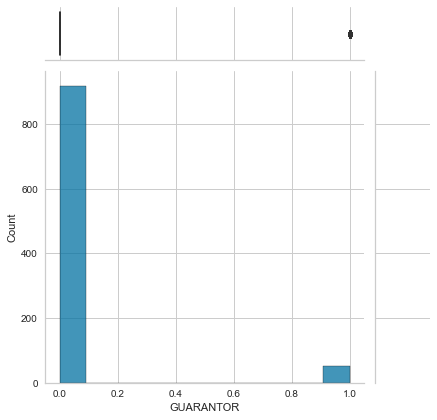

In [109]:
graf_func('GUARANTOR')

<AxesSubplot:xlabel='GUARANTOR'>

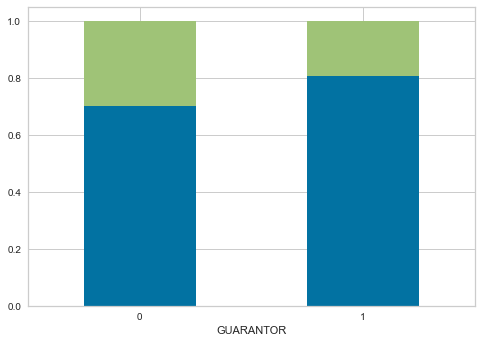

In [110]:
contingency('GUARANTOR')

In [111]:
data_tabla('GUARANTOR')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,0.061135,0.239753,0.0,0.0,0.0,0.0,1.0
1,283.0,0.035336,0.184954,0.0,0.0,0.0,0.0,1.0


In [112]:
logit('GUARANTOR')

Optimization terminated successfully.
         Current function value: 0.602249
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                  P>chi2  df constraint
Intercept   [[141.7923707182207]]  1.0796447146874074e-32              1
x          [[2.5652574791884177]]     0.10923477116334147              1

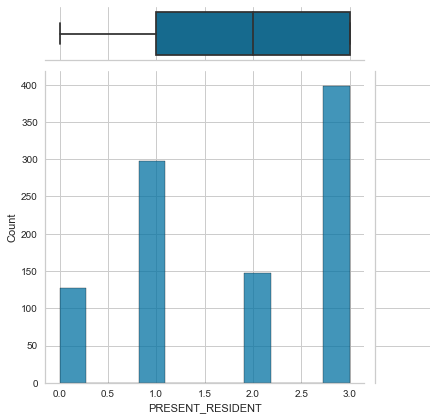

In [113]:
graf_func('PRESENT_RESIDENT')

<AxesSubplot:xlabel='PRESENT_RESIDENT'>

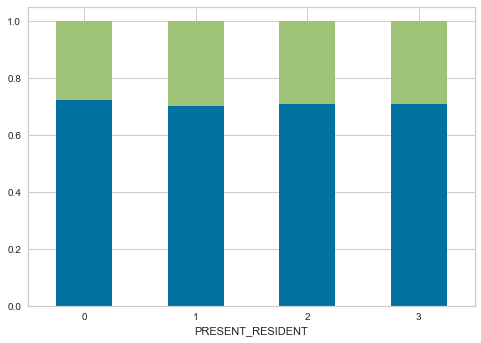

In [114]:
contingency('PRESENT_RESIDENT')

In [115]:
data_tabla('PRESENT_RESIDENT')

,count,unique,top,freq
DEFAULT,,,,
0,687,4,3,282
1,283,4,3,116


In [116]:
logit('PRESENT_RESIDENT')

Optimization terminated successfully.
         Current function value: 0.603706
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                              chi2                 P>chi2  df constraint
Intercept   [[42.832784325472154]]  5.962449716629546e-11              1
x          [[0.01528082655333353]]     0.9016196082186669              1

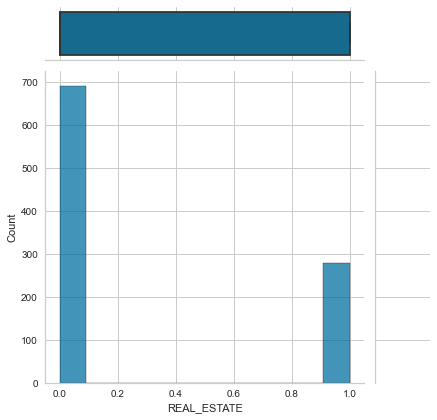

In [117]:
graf_func('REAL_ESTATE')

<AxesSubplot:xlabel='REAL_ESTATE'>

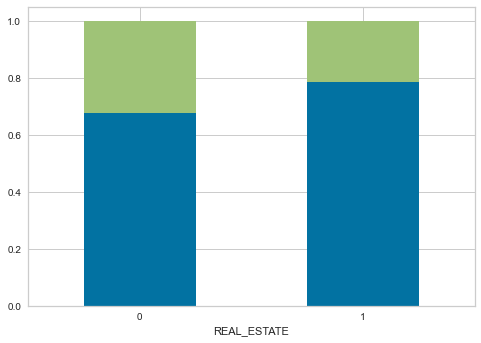

In [118]:
contingency('REAL_ESTATE')

In [119]:
data_tabla('REAL_ESTATE')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,0.318777,0.466342,0.0,0.0,0.0,1.0,1.0
1,283.0,0.212014,0.409459,0.0,0.0,0.0,0.0,1.0


In [120]:
logit('REAL_ESTATE')

Optimization terminated successfully.
         Current function value: 0.597745
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                 P>chi2  df constraint
Intercept   [[82.99589195586319]]  8.222408914419341e-20              1
x          [[10.996129995930378]]  0.0009130233025229733              1

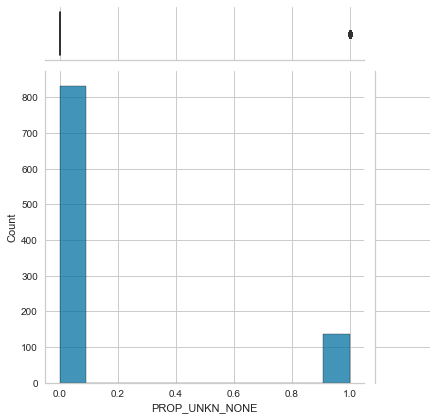

In [121]:
graf_func('PROP_UNKN_NONE')

<AxesSubplot:xlabel='PROP_UNKN_NONE'>

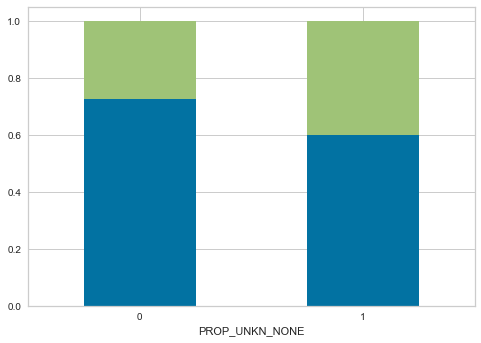

In [122]:
contingency('PROP_UNKN_NONE')

In [123]:
data_tabla('PROP_UNKN_NONE')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,0.120815,0.326150,0.0,0.0,0.0,0.0,1.0
1,283.0,0.194346,0.396398,0.0,0.0,0.0,0.0,1.0


In [124]:
logit('PROP_UNKN_NONE')

Optimization terminated successfully.
         Current function value: 0.599353
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                            chi2                 P>chi2  df constraint
Intercept  [[157.0978282469823]]  4.872739498504066e-36              1
x          [[8.730109643255638]]   0.003129976746550412              1

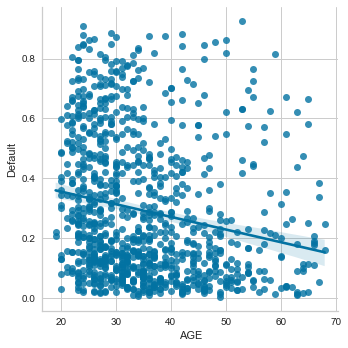

In [125]:
logplot1('AGE',df)

In [126]:
logit('AGE')

Optimization terminated successfully.
         Current function value: 0.598761
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                              chi2                 P>chi2  df constraint
Intercept  [[0.42595248539651426]]     0.5139817148327255              1
x            [[9.172009468367161]]  0.0024574459391196123              1

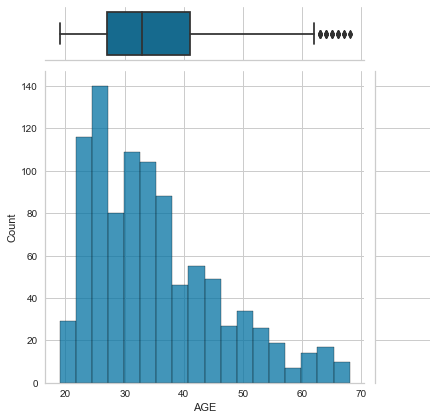

In [127]:
graf_func('AGE')

<AxesSubplot:xlabel='AGE'>

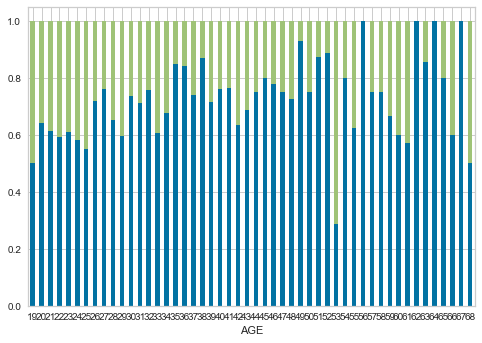

In [128]:
contingency('AGE')

In [129]:
data_tabla('AGE')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,35.861718,10.856194,19.0,27.0,34.0,42.0,68.0
1,283.0,33.526502,10.697410,19.0,25.0,30.0,39.5,68.0


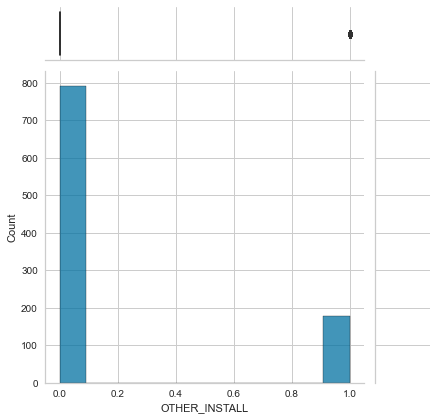

In [130]:
graf_func('OTHER_INSTALL')

<AxesSubplot:xlabel='OTHER_INSTALL'>

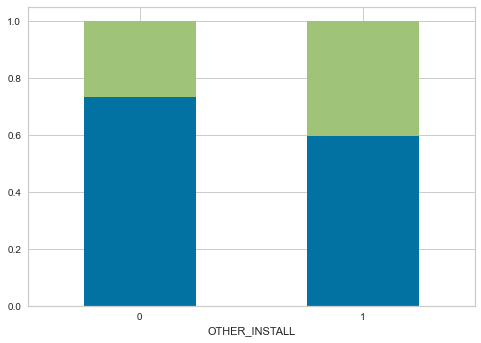

In [131]:
contingency('OTHER_INSTALL')

In [132]:
data_tabla('OTHER_INSTALL')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,0.155750,0.362882,0.0,0.0,0.0,0.0,1.0
1,283.0,0.254417,0.436305,0.0,0.0,0.0,1.0,1.0


In [133]:
logit('OTHER_INSTALL')

Optimization terminated successfully.
         Current function value: 0.597330
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                  P>chi2  df constraint
Intercept  [[158.19118964488155]]  2.8110285456033937e-36              1
x          [[12.735938942281992]]   0.0003586957020612892              1

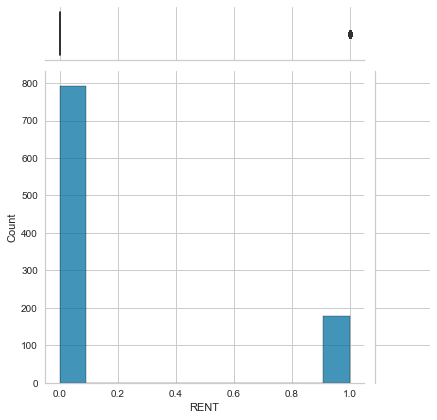

In [134]:
graf_func('RENT')

<AxesSubplot:xlabel='RENT'>

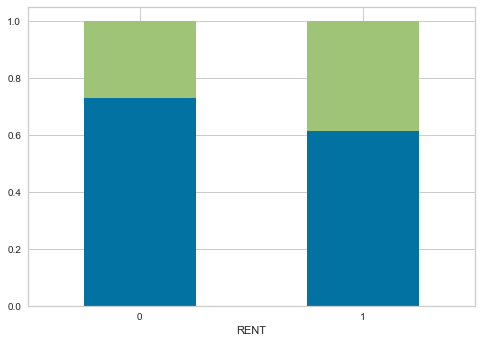

In [135]:
contingency('RENT')

In [136]:
data_tabla('RENT')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,0.158661,0.365626,0.0,0.0,0.0,0.0,1.0
1,283.0,0.243816,0.430144,0.0,0.0,0.0,0.0,1.0


In [137]:
logit('RENT')

Optimization terminated successfully.
         Current function value: 0.598915
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                  P>chi2  df constraint
Intercept  [[154.18343592247024]]  2.1117428206297677e-35              1
x           [[9.566931581842052]]   0.0019811363739606403              1

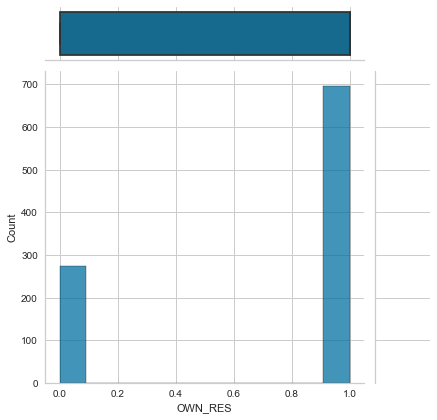

In [138]:
graf_func('OWN_RES')

<AxesSubplot:xlabel='OWN_RES'>

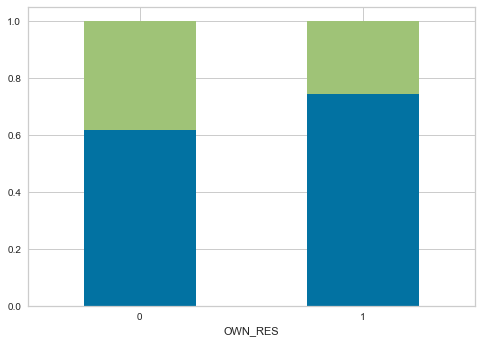

In [139]:
contingency('OWN_RES')

In [140]:
data_tabla('OWN_RES')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,0.754003,0.430991,0.0,1.0,1.0,1.0,1.0
1,283.0,0.628975,0.483935,0.0,0.0,1.0,1.0,1.0


In [141]:
logit('OWN_RES')

Optimization terminated successfully.
         Current function value: 0.595976
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                            chi2                 P>chi2  df constraint
Intercept  [[14.66989039636329]]  0.0001280759466964206              1
x          [[15.25760828201866]]  9.379815084928388e-05              1

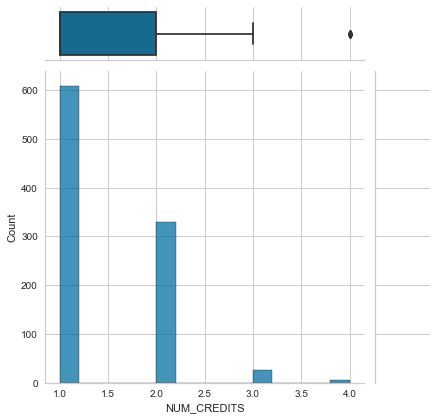

In [142]:
graf_func('NUM_CREDITS')

<AxesSubplot:xlabel='NUM_CREDITS'>

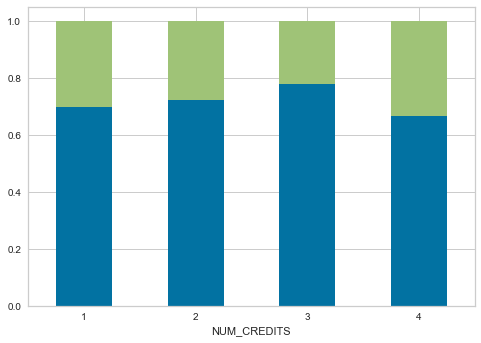

In [143]:
contingency('NUM_CREDITS')

In [144]:
data_tabla('NUM_CREDITS')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,1.425036,0.583906,1.0,1.0,1.0,2.0,4.0
1,283.0,1.385159,0.568118,1.0,1.0,1.0,2.0,4.0


In [145]:
logit('NUM_CREDITS')

Optimization terminated successfully.
         Current function value: 0.603217
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                            chi2                 P>chi2  df constraint
Intercept  [[14.58129960449505]]  0.0001342401241657876              1
x          [[0.949184981777088]]     0.3299268399728925              1

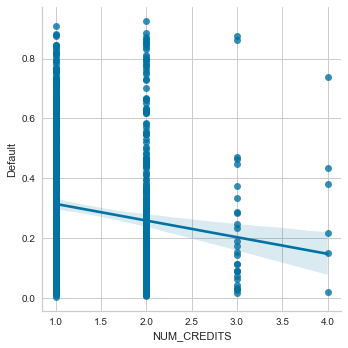

In [146]:
logplot1('NUM_CREDITS',df)

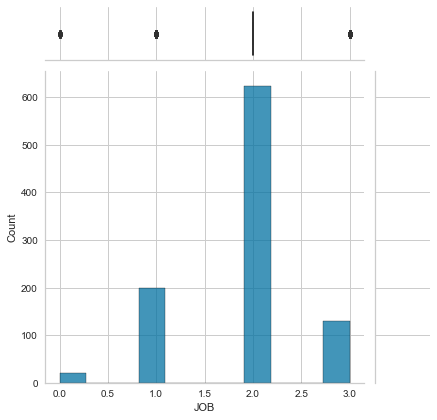

In [147]:
graf_func('JOB')

<AxesSubplot:xlabel='JOB'>

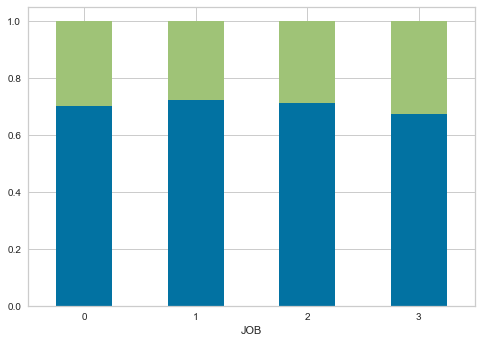

In [148]:
contingency('JOB')

In [149]:
data_tabla('JOB')

,count,unique,top,freq
DEFAULT,,,,
0,687,4,2,443
1,283,4,2,180


In [150]:
logit('JOB')

Optimization terminated successfully.
         Current function value: 0.603420
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                 P>chi2  df constraint
Intercept  [[21.955806466039892]]  2.790014978110281e-06              1
x          [[0.5666815862690652]]     0.4515805870011226              1

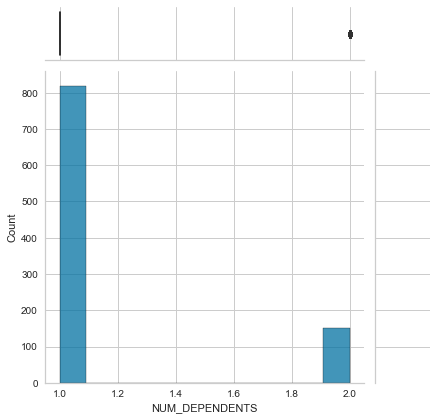

In [151]:
graf_func('NUM_DEPENDENTS')

<AxesSubplot:xlabel='NUM_DEPENDENTS'>

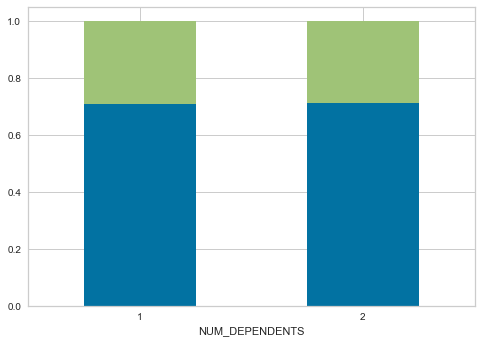

In [152]:
contingency('NUM_DEPENDENTS')

In [153]:
data_tabla('NUM_DEPENDENTS')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,1.157205,0.364259,1.0,1.0,1.0,1.0,2.0
1,283.0,1.155477,0.363001,1.0,1.0,1.0,1.0,2.0


In [154]:
logit('NUM_DEPENDENTS')

Optimization terminated successfully.
         Current function value: 0.603711
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                               chi2                 P>chi2  df constraint
Intercept    [[13.659986106490326]]  0.0002190731210630657              1
x          [[0.004530081754561938]]     0.9463381943343964              1

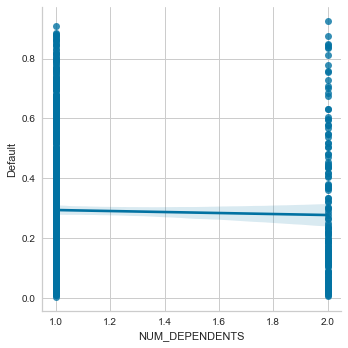

In [155]:
logplot1('NUM_DEPENDENTS',df)

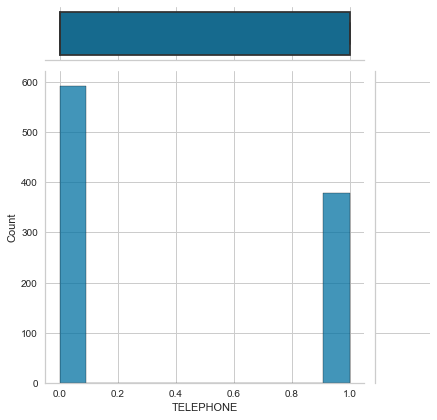

In [156]:
graf_func('TELEPHONE')

<AxesSubplot:xlabel='TELEPHONE'>

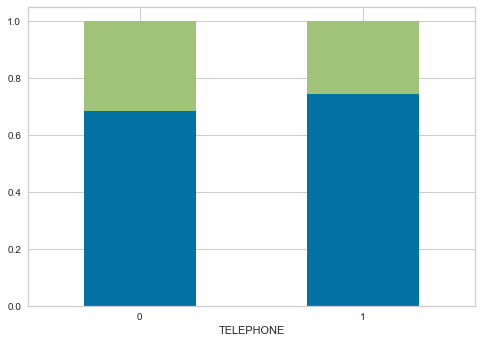

In [157]:
contingency('TELEPHONE')

In [158]:
data_tabla('TELEPHONE')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,0.409025,0.492012,0.0,0.0,0.0,1.0,1.0
1,283.0,0.342756,0.475472,0.0,0.0,0.0,1.0,1.0


In [159]:
logit('TELEPHONE')

Optimization terminated successfully.
         Current function value: 0.601787
         Iterations 5


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                  P>chi2  df constraint
Intercept   [[77.72873179480068]]  1.1820927382996235e-18              1
x          [[3.6904500789542554]]     0.05472484726136939              1

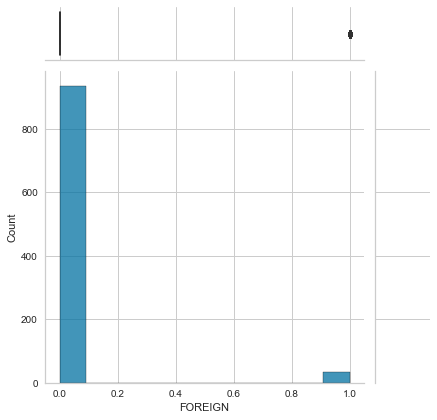

In [160]:
graf_func('FOREIGN')

<AxesSubplot:xlabel='FOREIGN'>

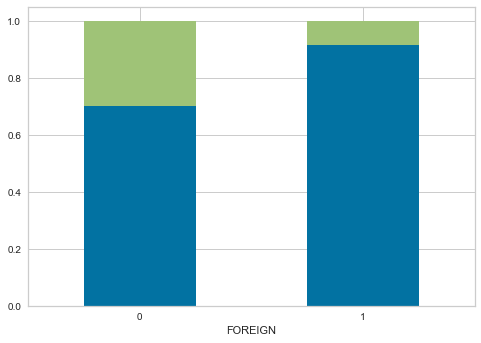

In [161]:
contingency('FOREIGN')

In [162]:
data_tabla('FOREIGN')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,0.046579,0.210890,0.0,0.0,0.0,0.0,1.0
1,283.0,0.010601,0.102594,0.0,0.0,0.0,0.0,1.0


In [163]:
logit('FOREIGN')

Optimization terminated successfully.
         Current function value: 0.598940
         Iterations 6


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                  P>chi2  df constraint
Intercept  [[141.66671193641702]]  1.1501572465254038e-32              1
x            [[6.22734056625585]]    0.012579251950645912              1

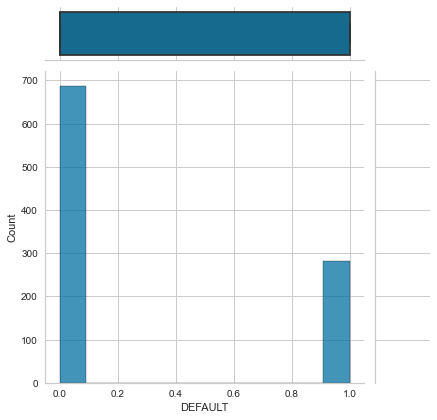

In [164]:
graf_func('DEFAULT')

<AxesSubplot:xlabel='DEFAULT'>

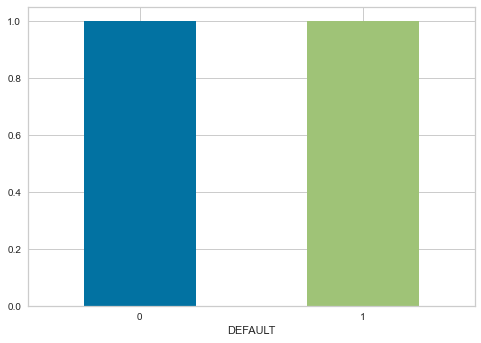

In [165]:
contingency('DEFAULT')

In [166]:
data_tabla('DEFAULT')

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,687.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,283.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [167]:
scaler= MinMaxScaler()

x_scaler= scaler.fit_transform(df.drop(columns='DEFAULT'))

x_scaler

array([[0.        , 0.03571429, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.78571429, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.14285714, 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.14285714, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.73214286, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.73214286, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [168]:
data_scaler= pd.DataFrame(data=(x_scaler), columns=(df.drop(columns='DEFAULT').columns))
df_scal= pd.concat([data_scaler,df['DEFAULT']],axis=1)
df_scal

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO_TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
0,0.000000,0.035714,1.00,0.0,0.0,0.0,1.0,0.0,0.0,0.078628,...,0.979592,0.0,0.0,1.0,0.333333,0.666667,0.0,1.0,0.0,0
1,0.333333,0.785714,0.50,0.0,0.0,0.0,1.0,0.0,0.0,0.487765,...,0.061224,0.0,0.0,1.0,0.000000,0.666667,0.0,0.0,0.0,1
2,1.000000,0.142857,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.157940,...,0.612245,0.0,0.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0
3,0.000000,0.678571,0.50,0.0,0.0,1.0,0.0,0.0,0.0,0.652977,...,0.530612,0.0,0.0,0.0,0.000000,0.666667,1.0,0.0,0.0,0
4,0.000000,0.357143,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.395277,...,0.693878,0.0,0.0,0.0,0.333333,0.666667,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,1.000000,0.142857,0.50,0.0,0.0,1.0,0.0,0.0,0.0,0.127139,...,0.244898,0.0,0.0,1.0,0.000000,0.333333,0.0,0.0,0.0,0
966,0.000000,0.464286,0.50,0.0,1.0,0.0,0.0,0.0,0.0,0.308607,...,0.428571,0.0,0.0,1.0,0.000000,1.000000,0.0,1.0,0.0,0
967,1.000000,0.142857,0.50,0.0,0.0,0.0,1.0,0.0,0.0,0.047399,...,0.387755,0.0,0.0,1.0,0.000000,0.666667,0.0,0.0,0.0,0
968,0.000000,0.732143,0.50,0.0,0.0,0.0,1.0,0.0,0.0,0.136465,...,0.081633,0.0,0.0,0.0,0.000000,0.666667,0.0,1.0,0.0,1


<AxesSubplot:ylabel='Density'>

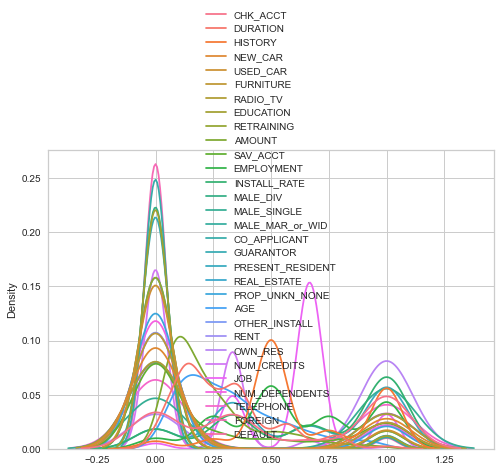

In [169]:
sns.kdeplot(data=df_scal)

In [170]:
correlation,p= stats.spearmanr(df)
correlation=pd.DataFrame(data= correlation, columns= df.columns, index= df.columns)
correlation['DEFAULT']

CHK_ACCT           -0.350126
DURATION            0.199830
HISTORY            -0.207638
NEW_CAR             0.096692
USED_CAR           -0.111501
FURNITURE           0.031996
RADIO_TV           -0.099494
EDUCATION           0.069425
RETRAINING          0.034617
AMOUNT              0.056642
SAV_ACCT           -0.177027
EMPLOYMENT         -0.130025
INSTALL_RATE        0.089639
MALE_DIV            0.052243
MALE_SINGLE        -0.080831
MALE_MAR_or_WID    -0.019831
CO_APPLICANT        0.076447
GUARANTOR          -0.052067
PRESENT_RESIDENT    0.003448
REAL_ESTATE        -0.107214
PROP_UNKN_NONE      0.095685
AGE                -0.116987
OTHER_INSTALL       0.115619
RENT                0.100003
OWN_RES            -0.126240
NUM_CREDITS        -0.032425
JOB                 0.025611
NUM_DEPENDENTS     -0.002161
TELEPHONE          -0.061769
FOREIGN            -0.087695
DEFAULT             1.000000
Name: DEFAULT, dtype: float64

In [171]:
pvalue=pd.DataFrame(data= p, columns= df.columns, index= df.columns)
pvalue['DEFAULT']

CHK_ACCT            2.355026e-29
DURATION            3.406040e-10
HISTORY             6.586220e-11
NEW_CAR             2.572897e-03
USED_CAR            5.031866e-04
FURNITURE           3.195091e-01
RADIO_TV            1.919355e-03
EDUCATION           3.061490e-02
RETRAINING          2.814411e-01
AMOUNT              7.785649e-02
SAV_ACCT            2.852359e-08
EMPLOYMENT          4.873238e-05
INSTALL_RATE        5.208762e-03
MALE_DIV            1.039278e-01
MALE_SINGLE         1.179053e-02
MALE_MAR_or_WID     5.373093e-01
CO_APPLICANT        1.724993e-02
GUARANTOR           1.050976e-01
PRESENT_RESIDENT    9.145948e-01
REAL_ESTATE         8.243022e-04
PROP_UNKN_NONE      2.853614e-03
AGE                 2.608398e-04
OTHER_INSTALL       3.080844e-04
RENT                1.818563e-03
OWN_RES             8.065620e-05
NUM_CREDITS         3.130538e-01
JOB                 4.255872e-01
NUM_DEPENDENTS      9.464070e-01
TELEPHONE           5.446139e-02
FOREIGN             6.276042e-03
DEFAULT   

<AxesSubplot:>

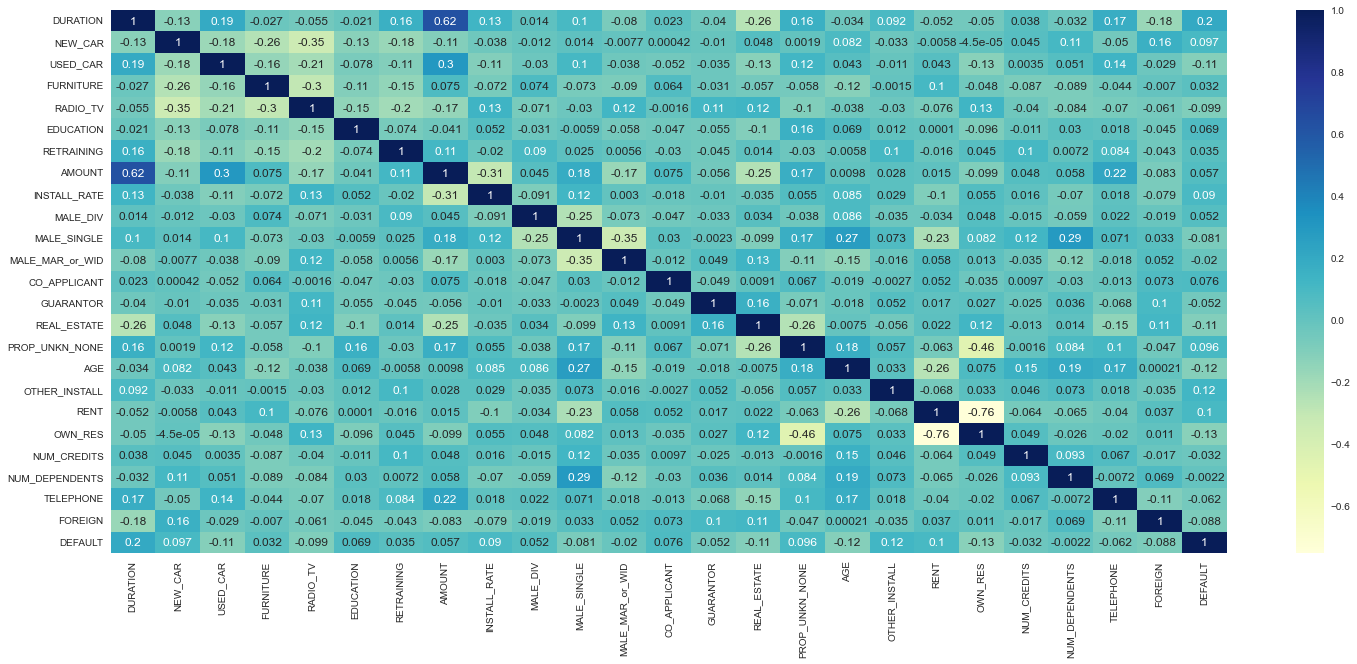

In [172]:
correlation= df.corr(method='spearman')
plt.figure(figsize=(25,10))
sns.heatmap(correlation, annot=True, cmap= 'YlGnBu')

In [173]:
df_var= VarClusHi(df_scal,maxclus=None,maxeigval2=0.7)
df_var.varclus()

In [174]:
df_var.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,2,1.635864,0.364136,0.817932
1,1,1,1.000000,0.000000,1.000000
2,2,2,1.755574,0.244426,0.877787
3,3,2,1.345434,0.654566,0.672717
4,4,2,1.350721,0.649279,0.675361
5,5,2,1.435437,0.564563,0.717719
6,6,1,1.000000,0.000000,1.000000
7,7,1,1.000000,0.000000,1.000000
8,8,1,1.000000,0.000000,1.000000
9,9,2,1.369402,0.630598,0.684701


In [175]:
df_var.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,DURATION,0.817932,0.054053,1.924719e-01
1,0,AMOUNT,0.817932,0.101059,2.025362e-01
2,1,AGE,1.000000,0.081224,0.000000e+00
3,2,RENT,0.877787,0.052142,1.289362e-01
4,2,OWN_RES,0.877787,0.210672,1.548321e-01
5,3,NEW_CAR,0.672717,0.068019,3.511690e-01
6,3,RADIO_TV,0.672717,0.091073,3.600763e-01
7,4,CHK_ACCT,0.675361,0.052151,3.425012e-01
8,4,DEFAULT,0.675361,0.032215,3.354458e-01
9,5,HISTORY,0.717719,0.059328,3.000847e-01


In [176]:
corr= stats.spearmanr(df_scal[['DEFAULT','RENT','OWN_RES']])
corr[0][0]

array([ 1.        ,  0.10000259, -0.12624022])

In [177]:
corr2= stats.spearmanr(df_scal[['DEFAULT','AMOUNT','DURATION']])
corr2[0][0]

array([1.        , 0.05664248, 0.19982967])

In [178]:
corr3= stats.spearmanr(df_scal[['DEFAULT','HISTORY','NUM_CREDITS']])
corr3[0][0]

array([ 1.        , -0.20763757, -0.03242503])

In [179]:
corr4= stats.spearmanr(df_scal[['DEFAULT','NEW_CAR','RADIO_TV']])
corr4[0][0]

array([ 1.        ,  0.09669185, -0.09949423])

In [180]:
corr5= stats.spearmanr(df_scal[['DEFAULT','TELEPHONE','JOB']])
corr5[0][0]

array([ 1.        , -0.06176926,  0.02561143])

In [181]:
df.drop(columns=['DEFAULT']).astype('int64').sum().rank(method='average', ascending=False)

CHK_ACCT             9.0
DURATION             3.0
HISTORY              5.0
NEW_CAR             18.0
USED_CAR            23.0
FURNITURE           19.0
RADIO_TV            17.0
EDUCATION           27.0
RETRAINING          24.5
AMOUNT               1.0
SAV_ACCT            12.0
EMPLOYMENT           6.0
INSTALL_RATE         4.0
MALE_DIV            28.0
MALE_SINGLE         14.0
MALE_MAR_or_WID     24.5
CO_APPLICANT        29.0
GUARANTOR           26.0
PRESENT_RESIDENT     8.0
REAL_ESTATE         16.0
PROP_UNKN_NONE      22.0
AGE                  2.0
OTHER_INSTALL       20.0
RENT                21.0
OWN_RES             13.0
NUM_CREDITS         10.0
JOB                  7.0
NUM_DEPENDENTS      11.0
TELEPHONE           15.0
FOREIGN             30.0
dtype: float64

In [182]:
def woe_iv(column, dtype,user_splits=None):
    x= df[column]
    y= df['DEFAULT']
    #y= default['N_DEFAULT'].values
    optb= OptimalBinning(name='y', dtype=dtype,monotonic_trend='auto',
                         user_splits=user_splits
                         
                        )
    #method : 'uniform', 'quantile', 'cart', 'mdlp'
    #solver : str, optional (default="cp")
    #The optimizer to solve the optimal binning problem. Supported solversare "mip" to choose a mixed-integer programming solver, "cp" to choosea constrained programming solver or "ls" to choose `LocalSolver<https://www.localsolver.com/>`_.
    optb.fit(x,y)
    binning_table= optb.binning_table
    return binning_table.build()

In [183]:
def woe(column, dtype,bins,method):
    x= df[column]
    y= df['DEFAULT']    #y= default['N_DEFAULT'].values
    optb= OptimalBinning(name='y', dtype=dtype,monotonic_trend='auto',
                         max_n_prebins=bins,prebinning_method= method,
                        )
    #method : 'uniform', 'quantile', 'cart', 'mdlp'
    optb.fit(x,y)
    binning_table= optb.binning_table
    return binning_table.build()

In [184]:
woe_iv('DURATION','numerical',user_splits=[11,15,24,30])

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 11.00)",164,0.169072,140,24,0.146341,0.876701,0.104309,0.012636
1,"[11.00, 15.00)",196,0.202062,146,50,0.255102,0.184696,0.006619,0.000826
2,"[15.00, 24.00)",217,0.223711,154,63,0.290323,0.00693,0.000011,0.000001
3,"[24.00, 30.00)",198,0.204124,137,61,0.308081,-0.07778,0.001255,0.000157
4,"[30.00, inf)",195,0.201031,110,85,0.435897,-0.629058,0.088217,0.010849
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.200411,0.024470


In [185]:
woe('AMOUNT','numerical',9,'quantile')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 958.67)",108,0.111340,73,35,0.324074,-0.151776,0.002643,0.000330
1,"[958.67, 1288.33)",108,0.111340,75,33,0.305556,-0.065907,0.000490,0.000061
2,"[1288.33, 3181.00)",430,0.443299,324,106,0.246512,0.230417,0.022364,0.002789
3,"[3181.00, 4042.00)",107,0.110309,85,22,0.205607,0.464721,0.021372,0.002648
4,"[4042.00, 6337.33)",109,0.112371,69,40,0.366972,-0.34166,0.013976,0.001739
5,"[6337.33, inf)",108,0.111340,61,47,0.435185,-0.626161,0.048393,0.005952
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.109238,0.013519


In [186]:
woe('INSTALL_RATE', 'categorical',4,'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],128,0.131959,100,28,0.218750,0.386078,0.017999,0.002236
1,[2],221,0.227835,163,58,0.262443,0.14642,0.004732,0.000591
2,[3],153,0.157732,111,42,0.274510,0.084973,0.001118,0.000140
3,[4],468,0.482474,313,155,0.331197,-0.184109,0.016956,0.002117
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.040806,0.005083


In [187]:
woe('AGE', 'numerical',7,'quantile')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 24.00)",102,0.105155,62,40,0.392157,-0.448632,0.022923,0.002842
1,"[24.00, 27.00)",133,0.137113,83,50,0.375940,-0.38007,0.021232,0.002638
2,"[27.00, 35.00)",303,0.312371,209,94,0.310231,-0.087848,0.002454,0.000307
3,"[35.00, 40.00)",149,0.153608,121,28,0.187919,0.576699,0.044514,0.005488
4,"[40.00, inf)",283,0.291753,212,71,0.250883,0.207019,0.011946,0.001491
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.103069,0.012765


In [188]:
woe('NUM_CREDITS','categorical',4,'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[3],27,0.027835,21,6,0.222222,0.365876,0.003427,0.000426
1,[2],329,0.339175,238,91,0.276596,0.074524,0.001854,0.000232
2,[1],608,0.626804,424,184,0.302632,-0.05209,0.001719,0.000215
3,[4],6,0.006186,4,2,0.333333,-0.19374,0.000241,0.000030
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.007241,0.000903


In [189]:
woe('NUM_DEPENDENTS', 'categorical',2, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[2],152,0.156701,108,44,0.289474,0.011054,0.000019,2.387983e-06
1,[1],818,0.843299,579,239,0.292176,-0.002048,0.000004,4.425226e-07
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,970,1.000000,687,283,0.291753,,0.000023,2.830505e-06


In [190]:
woe('NEW_CAR', 'categorical',2, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[0],747,0.770103,547,200,0.267738,0.119244,0.010673,0.001333
1,[1],223,0.229897,140,83,0.372197,-0.364086,0.032586,0.004051
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.043259,0.005384


In [191]:
woe('USED_CAR', 'categorical',2, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],99,0.102062,85,14,0.141414,0.916707,0.068071,0.008223
1,[0],871,0.897938,602,269,0.308840,-0.081341,0.006040,0.000755
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.074111,0.008978


In [192]:
woe('FURNITURE', 'categorical',2, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[0],790,0.814433,565,225,0.284810,0.033838,0.000926,0.000116
1,[1],180,0.185567,122,58,0.322222,-0.143309,0.003921,0.000490
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.004847,0.000605


In [193]:
woe('RADIO_TV', 'categorical',2, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],277,0.285567,216,61,0.220217,0.377517,0.037322,0.004638
1,[0],693,0.714433,471,222,0.320346,-0.134707,0.013317,0.001663
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.050640,0.006301


In [194]:
woe('EDUCATION', 'categorical',2, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[0],921,0.949485,659,262,0.284473,0.035492,0.001187,0.000148
1,[1],49,0.050515,28,21,0.428571,-0.599205,0.020042,0.002468
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.021229,0.002617


In [195]:
woe('RETRAINING', 'categorical',2, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[0],879,0.906186,627,252,0.286689,0.02463,0.000547,0.000068
1,[1],91,0.093814,60,31,0.340659,-0.22653,0.005030,0.000627
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.005577,0.000696


In [196]:
woe('MALE_DIV', 'categorical',2, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[0],922,0.950515,658,264,0.286334,0.026368,0.000657,0.000082
1,[1],48,0.049485,29,19,0.395833,-0.464031,0.011566,0.001433
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.012223,0.001515


In [197]:
woe('MALE_SINGLE', 'categorical',2, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],527,0.543299,391,136,0.258065,0.169165,0.014984,0.001871
1,[0],443,0.456701,296,147,0.331828,-0.186961,0.016560,0.002067
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.031544,0.003938


In [198]:
woe('MALE_MAR_or_WID', 'categorical',2, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],91,0.093814,67,24,0.263736,0.139751,0.001778,0.000222
1,[0],879,0.906186,620,259,0.294653,-0.013996,0.000178,0.000022
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.001956,0.000244


In [199]:
woe('GUARANTOR', 'categorical',2, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],52,0.053608,42,10,0.192308,0.548197,0.014143,0.001746
1,[0],918,0.946392,645,273,0.297386,-0.027109,0.000699,0.000087
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.014843,0.001834


In [200]:
woe('CO_APPLICANT', 'categorical',2, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[0],931,0.959794,666,265,0.284640,0.034672,0.001145,0.000143
1,[1],39,0.040206,21,18,0.461538,-0.732737,0.024207,0.002960
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.025353,0.003103


In [201]:
woe('REAL_ESTATE', 'categorical',2, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],279,0.287629,219,60,0.215054,0.40784,0.043542,0.005405
1,[0],691,0.712371,468,223,0.322721,-0.145591,0.015544,0.001941
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.059086,0.007347


In [202]:
woe('PROP_UNKN_NONE', 'categorical',2, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[0],832,0.857732,604,228,0.274038,0.087341,0.006422,0.000803
1,[1],138,0.142268,83,55,0.398551,-0.47538,0.034955,0.004329
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.041378,0.005131


In [203]:
woe('OTHER_INSTALL', 'categorical',2, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[0],791,0.815464,580,211,0.266751,0.124283,0.012263,0.001532
1,[1],179,0.184536,107,72,0.402235,-0.490725,0.048418,0.005992
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.060681,0.007524


In [204]:
woe('RENT', 'categorical',2, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[0],792,0.816495,578,214,0.270202,0.10671,0.009087,0.001135
1,[1],178,0.183505,109,69,0.387640,-0.429646,0.036587,0.004538
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.045674,0.005674


In [205]:
woe('OWN_RES', 'categorical',2, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],696,0.717526,518,178,0.255747,0.181304,0.022668,0.002830
1,[0],274,0.282474,169,105,0.383212,-0.410949,0.051380,0.006378
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.074048,0.009207


In [206]:
woe('TELEPHONE', 'categorical',2, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],378,0.389691,281,97,0.256614,0.176756,0.011713,0.001462
1,[0],592,0.610309,406,186,0.314189,-0.106281,0.007043,0.000880
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.018756,0.002342


In [207]:
woe('FOREIGN', 'categorical',2, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],35,0.036082,32,3,0.085714,1.480236,0.053257,0.006109
1,[0],935,0.963918,655,280,0.299465,-0.037042,0.001333,0.000167
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.054590,0.006276


In [208]:
woe('CHK_ACCT', 'categorical',4, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[3],388,0.400000,343,45,0.115979,1.144181,0.389321,0.046173
1,[2],62,0.063918,48,14,0.225806,0.345256,0.007043,0.000876
2,[1],252,0.259794,161,91,0.361111,-0.316343,0.027586,0.003434
3,[0],268,0.276289,135,133,0.496269,-0.871962,0.238445,0.028896
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.662394,0.079379


In [209]:
woe('HISTORY', 'categorical',5, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[4],287,0.295876,238,49,0.170732,0.693563,0.120187,0.014729
1,[2],515,0.530928,357,158,0.306796,-0.071747,0.002773,0.000347
2,[3],86,0.088660,58,28,0.325581,-0.158649,0.002303,0.000288
3,[1],46,0.047423,20,26,0.565217,-1.149252,0.072128,0.008550
4,[0],36,0.037113,14,22,0.611111,-1.338873,0.076798,0.008941
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.274188,0.032855


In [210]:
woe('SAV_ACCT', 'categorical',5, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[3],48,0.049485,42,6,0.125000,1.059023,0.042291,0.005052
1,[4],175,0.180412,146,29,0.165714,0.729423,0.080269,0.009817
2,[2],62,0.063918,51,11,0.177419,0.647043,0.022884,0.002812
3,[1],100,0.103093,69,31,0.310000,-0.086768,0.000790,0.000099
4,[0],585,0.603093,379,206,0.352137,-0.277227,0.048859,0.006088
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.195093,0.023868


In [211]:
woe('EMPLOYMENT', 'categorical',5, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[3],169,0.174227,131,38,0.224852,0.350724,0.019784,0.002460
1,[4],246,0.253608,188,58,0.235772,0.289112,0.019864,0.002474
2,[2],330,0.340206,232,98,0.296970,-0.025118,0.000216,0.000027
3,[0],55,0.056701,34,21,0.381818,-0.405049,0.010011,0.001243
4,[1],170,0.175258,102,68,0.400000,-0.481422,0.044200,0.005472
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.094074,0.011677


In [212]:
woe('PRESENT_RESIDENT', 'categorical',4, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[0],127,0.130928,92,35,0.275591,0.079553,8.146767e-04,1.018077e-04
1,[3],398,0.410309,282,116,0.291457,0.001429,8.381878e-07,1.047735e-07
2,[2],147,0.151546,104,43,0.292517,-0.003697,2.072464e-06,2.590579e-07
3,[1],298,0.307216,209,89,0.298658,-0.03319,3.407362e-04,4.259007e-05
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
Totals,,970,1.000000,687,283,0.291753,,1.158324e-03,1.447616e-04


In [213]:
woe('JOB', 'categorical',4, 'uniform')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],198,0.204124,143,55,0.277778,0.068624,0.000947,0.000118
1,[2],623,0.642268,443,180,0.288925,0.013726,0.000121,0.000015
2,[0],20,0.020619,14,6,0.300000,-0.03959,0.000033,0.000004
3,[3],129,0.132990,87,42,0.325581,-0.158649,0.003454,0.000431
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,970,1.000000,687,283,0.291753,,0.004555,0.000569


## VARIABLE SELECTION

In [214]:
x=  df.drop(columns=['DEFAULT'])
y= df['DEFAULT']

In [215]:
kf= StratifiedKFold(n_splits=5)

#### Forward Selection

In [216]:
log= LogisticRegression(random_state=0)
sfs= SequentialFeatureSelector(log,k_features=12,forward=True,scoring='roc_auc',cv=kf)
sfs.fit(x,y)

sfs.k_feature_names_

('CHK_ACCT',
 'DURATION',
 'HISTORY',
 'USED_CAR',
 'RADIO_TV',
 'EDUCATION',
 'SAV_ACCT',
 'EMPLOYMENT',
 'MALE_SINGLE',
 'GUARANTOR',
 'OTHER_INSTALL',
 'FOREIGN')

In [217]:
X1= sm.add_constant(x[['CHK_ACCT',
 'DURATION',
 'HISTORY',
 'USED_CAR',
 'RADIO_TV',
 'EDUCATION',
 'SAV_ACCT',
 'EMPLOYMENT',
 'MALE_SINGLE',
 'CO_APPLICANT',
 'OTHER_INSTALL',
 'FOREIGN']])
Y1=y

logit= sm.Logit(Y1,X1,hasconst=True).fit()
print(logit.summary(),logit.wald_test_terms())

Optimization terminated successfully.
         Current function value: 0.472666
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                  970
Model:                          Logit   Df Residuals:                      957
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Apr 2024   Pseudo R-squ.:                  0.2171
Time:                        04:08:14   Log-Likelihood:                -458.49
converged:                       True   LL-Null:                       -585.60
Covariance Type:            nonrobust   LLR p-value:                 1.792e-47
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5693      0.302      1.887      0.059      -0.022       1.160
CHK_ACCT         -0.

#### Backward Selection

In [218]:
log= LogisticRegression(random_state=0)
sfs= SequentialFeatureSelector(log,k_features=12,forward=False,scoring='roc_auc',cv=kf)
sfs.fit(x,y)

sfs.k_feature_names_

('CHK_ACCT',
 'DURATION',
 'HISTORY',
 'NEW_CAR',
 'USED_CAR',
 'EDUCATION',
 'SAV_ACCT',
 'EMPLOYMENT',
 'INSTALL_RATE',
 'GUARANTOR',
 'OTHER_INSTALL',
 'RENT')

In [219]:
X3= sm.add_constant(x[['CHK_ACCT',
 'DURATION',
 'HISTORY',
 'NEW_CAR',
 'USED_CAR',
 'EDUCATION',
 'SAV_ACCT',
 'EMPLOYMENT',
 'INSTALL_RATE',
 'CO_APPLICANT',
 'OTHER_INSTALL',
 'RENT']])
Y3=y

logit= sm.OLS(Y3,X3,hasconst=True).fit()
print(logit.summary(),logit.wald_test_terms())

                            OLS Regression Results                            
Dep. Variable:                DEFAULT   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     25.56
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           3.13e-50
Time:                        04:09:05   Log-Likelihood:                -476.77
No. Observations:                 970   AIC:                             979.5
Df Residuals:                     957   BIC:                             1043.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3550      0.059      5.969

In [220]:
def stepwise_selection(data, target,SL_in=0.05,SL_out =0.1):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [221]:
stepwise_selection(x,y)

['CHK_ACCT',
 'DURATION',
 'HISTORY',
 'USED_CAR',
 'SAV_ACCT',
 'GUARANTOR',
 'NEW_CAR',
 'EDUCATION',
 'OTHER_INSTALL',
 'RENT',
 'INSTALL_RATE',
 'EMPLOYMENT',
 'FOREIGN']

In [222]:
X4= sm.add_constant(x[['CHK_ACCT',
 'DURATION',
 'HISTORY',
 'USED_CAR',
 'SAV_ACCT',
 'CO_APPLICANT',
 'NEW_CAR',
 'EDUCATION',
 'OTHER_INSTALL',
 'RENT',
 'INSTALL_RATE',
 'EMPLOYMENT',
 'FOREIGN']])
Y4= y
                   
logit= sm.OLS(Y4,X4).fit()
print(logit.summary(),logit.wald_test_terms())

                            OLS Regression Results                            
Dep. Variable:                DEFAULT   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     24.34
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           4.20e-51
Time:                        04:09:07   Log-Likelihood:                -472.93
No. Observations:                 970   AIC:                             973.9
Df Residuals:                     956   BIC:                             1042.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3731      0.060      6.256

Se crearon modelos para medir el rendimiento de las variables y seleccionar las mejores variables, posteriormente se analizarán los modelos

In [223]:
logistic= LogisticRegression(random_state=0)
logistic.fit(x,y)

param_grid = {
    'penalty': ['none','l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga','elasticnet']
}

grid_search = GridSearchCV(estimator=LogisticRegression(random_state=0), param_grid=param_grid, cv=5)
grid_search.fit(x, y)

print(grid_search.best_params_)
print(grid_search.best_score_)

log1 = LogisticRegression(C= 0.1, solver='liblinear',penalty='l2',random_state=0)
log1.fit(x,y)
print(log1.coef_)


scores= cross_val_score(log1,x,y,cv=kf)
print(scores)
print(scores.mean())

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.7721649484536082
[[-5.22260298e-01  3.42809692e-02 -3.72843659e-01  4.74854692e-01
  -5.35796959e-01 -6.74426335e-02 -2.07885685e-01  3.09137444e-01
   5.40229939e-03  4.81186256e-05 -2.13878735e-01 -1.60669821e-01
   2.49275015e-01  1.93397323e-01 -3.67669853e-01 -1.15417965e-01
   2.33122722e-01 -3.82254916e-01  2.19723487e-02 -2.33442046e-01
   1.31988007e-01 -1.11909846e-02  4.36879144e-01  1.69057359e-01
  -1.49496962e-01  2.07434868e-01  5.20761517e-02  3.61771094e-02
  -2.60473003e-01 -2.97086897e-01]]
[0.76804124 0.75773196 0.80412371 0.75773196 0.77319588]
0.7721649484536082


In [224]:
rf = RandomForestClassifier(random_state=0)
rf.fit(x,y)

print(' ')

param_grid= {'n_estimators': range(1,50),
             'max_depth': range(1,4)}

grid_search = GridSearchCV(rf,param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x, y)
    
print(grid_search.best_params_)
print(grid_search.best_score_)

 
{'max_depth': 3, 'n_estimators': 4}
0.7237113402061857


In [225]:
rf1 = RandomForestClassifier(random_state=0, max_depth=3, n_estimators=4)
rf1.fit(x,y)

print(' ')

for i, importance in enumerate(rf1.feature_importances_):
    print(f"Feature {i}: {importance}")

print(' ')

scores= cross_val_score(RandomForestClassifier(random_state=0, max_depth= 3, n_estimators= 4),x,y,cv=kf)
print(scores)
print(scores.mean())

 
Feature 0: 0.5154178853195532
Feature 1: 0.05694975349423371
Feature 2: 0.1895235885719252
Feature 3: 0.0
Feature 4: 0.05976314953453479
Feature 5: 0.0
Feature 6: 0.0
Feature 7: 0.0
Feature 8: 0.0
Feature 9: 0.0
Feature 10: 0.006570928349361574
Feature 11: 0.0
Feature 12: 0.04593458407480139
Feature 13: 0.012892936514002121
Feature 14: 0.0
Feature 15: 0.00057243466799661
Feature 16: 0.004234017393244158
Feature 17: 0.0
Feature 18: 0.0011494873800485042
Feature 19: 0.01656429844686665
Feature 20: 0.011458499098084211
Feature 21: 0.06504358645360511
Feature 22: 0.0
Feature 23: 0.0
Feature 24: 0.0
Feature 25: 0.013924850701742712
Feature 26: 0.0
Feature 27: 0.0
Feature 28: 0.0
Feature 29: 0.0
 
[0.71649485 0.7371134  0.72680412 0.69072165 0.74742268]
0.7237113402061857


In [226]:
xgb = XGBClassifier(enable_categorical=True,random_state=0)
xgb.fit(x, y)
print(' ')

param_grid = {
    'max_depth': range(1,4),
    'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1],
    #'n_estimators': range(1,50)
}

grid_search = GridSearchCV(xgb, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x, y)

print(' ')
print(grid_search.best_params_)

 
 
{'learning_rate': 0.08, 'max_depth': 3}


In [227]:
xgb1 = XGBClassifier(enable_categorical=True,random_state=0,learning_rate=0.08,max_depth=3,n_estimators=7)
xgb1.fit(x,y)

print(' ')

for i, importance in enumerate(xgb1.feature_importances_):
    print(f"Feature {i}: {importance}")

print(' ')

scores= cross_val_score(xgb1,x,y,cv=kf)
print(scores)
print(scores.mean())

 
Feature 0: 0.4102466106414795
Feature 1: 0.12132471799850464
Feature 2: 0.07510069012641907
Feature 3: 0.0
Feature 4: 0.05641379579901695
Feature 5: 0.0
Feature 6: 0.0
Feature 7: 0.05277249217033386
Feature 8: 0.0
Feature 9: 0.0
Feature 10: 0.08644828200340271
Feature 11: 0.027195336297154427
Feature 12: 0.0
Feature 13: 0.0
Feature 14: 0.0
Feature 15: 0.0
Feature 16: 0.0
Feature 17: 0.0
Feature 18: 0.03208412975072861
Feature 19: 0.05155714973807335
Feature 20: 0.0
Feature 21: 0.03138222172856331
Feature 22: 0.05547458305954933
Feature 23: 0.0
Feature 24: 0.0
Feature 25: 0.0
Feature 26: 0.0
Feature 27: 0.0
Feature 28: 0.0
Feature 29: 0.0
 
[0.71134021 0.71134021 0.70618557 0.69587629 0.70618557]
0.7061855670103092


In [228]:
gbc= GradientBoostingClassifier(random_state=0,max_features=5)
gbc.fit(x,y)

param_grid = {
    'max_depth': range(1,3),
    'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1],
    'n_estimators': range(1,50)
}

grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x, y)
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 44}


In [229]:
gbc1 = GradientBoostingClassifier(random_state=0,learning_rate=0.1,max_depth=2,n_estimators=44)
gbc1.fit(x,y)

print(' ')

for i, importance in enumerate(gbc1.feature_importances_):
    print(f"Feature {i}: {importance}")

print(' ')

scores= cross_val_score(gbc1,x,y,cv=kf)
print(scores)
print(scores.mean())

 
Feature 0: 0.3899735303796408
Feature 1: 0.17175590878870817
Feature 2: 0.09465315309146212
Feature 3: 0.018852136523064018
Feature 4: 0.022401631949234002
Feature 5: 0.0
Feature 6: 0.0
Feature 7: 0.005287860655889155
Feature 8: 0.0036693431336427156
Feature 9: 0.06172613794433176
Feature 10: 0.043123075094678824
Feature 11: 0.02773556259979271
Feature 12: 0.016798001917078496
Feature 13: 0.0
Feature 14: 0.0025243669334797814
Feature 15: 0.0
Feature 16: 0.0
Feature 17: 0.027461186758008824
Feature 18: 0.0
Feature 19: 0.0
Feature 20: 0.003608954563188516
Feature 21: 0.03908933025687606
Feature 22: 0.05174992775374921
Feature 23: 0.0
Feature 24: 0.008197069867491786
Feature 25: 0.0036536992701407885
Feature 26: 0.003836750168852018
Feature 27: 0.0
Feature 28: 0.0
Feature 29: 0.0039023723506903503
 
[0.75257732 0.74226804 0.7371134  0.70618557 0.75773196]
0.7391752577319588


In [230]:
dt= DecisionTreeClassifier(random_state=0,criterion='log_loss')
dt.fit(x,y)
print(' ')

param_grid = {
    'max_depth': range(1,3)
}

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x, y)
print(' ')
print(grid_search.best_params_)

dt1= DecisionTreeClassifier(criterion='log_loss', max_depth=2,random_state=0)
dt1.fit(x,y)
print(' ')
for i, importance in enumerate(dt1.feature_importances_):
    print(f"Feature {i}: {importance}")
    
scores= cross_val_score(dt1,x,y,cv=kf)
print(scores)
print(scores.mean())

 
 
{'max_depth': 2}
 
Feature 0: 0.728943776303104
Feature 1: 0.1573229068909879
Feature 2: 0.0
Feature 3: 0.0
Feature 4: 0.0
Feature 5: 0.0
Feature 6: 0.0
Feature 7: 0.0
Feature 8: 0.0
Feature 9: 0.0
Feature 10: 0.0
Feature 11: 0.0
Feature 12: 0.0
Feature 13: 0.0
Feature 14: 0.0
Feature 15: 0.0
Feature 16: 0.0
Feature 17: 0.0
Feature 18: 0.0
Feature 19: 0.0
Feature 20: 0.0
Feature 21: 0.0
Feature 22: 0.11373331680590808
Feature 23: 0.0
Feature 24: 0.0
Feature 25: 0.0
Feature 26: 0.0
Feature 27: 0.0
Feature 28: 0.0
Feature 29: 0.0
[0.7371134  0.71134021 0.71134021 0.68556701 0.70618557]
0.7103092783505156


In [231]:
abc= AdaBoostClassifier(random_state=0)
abc.fit(x,y)
print(' ')

param_grid = {
    'n_estimators': range(1,50),
    'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
}

grid_search = GridSearchCV(abc, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x, y)
print(' ')
print(grid_search.best_params_)

 
 
{'learning_rate': 0.09, 'n_estimators': 48}


In [232]:
abc1= AdaBoostClassifier(random_state=0,learning_rate=0.09,n_estimators=100)
abc1.fit(x,y)
print(' ')
for i, importance in enumerate(abc1.feature_importances_):
    print(f"Feature {i}: {importance}")

    
scores= cross_val_score(abc1,x,y,cv=kf)
print(scores)
print(scores.mean())

 
Feature 0: 0.19
Feature 1: 0.16
Feature 2: 0.12
Feature 3: 0.03
Feature 4: 0.08
Feature 5: 0.0
Feature 6: 0.01
Feature 7: 0.0
Feature 8: 0.0
Feature 9: 0.11
Feature 10: 0.07
Feature 11: 0.05
Feature 12: 0.02
Feature 13: 0.0
Feature 14: 0.01
Feature 15: 0.0
Feature 16: 0.0
Feature 17: 0.02
Feature 18: 0.0
Feature 19: 0.01
Feature 20: 0.0
Feature 21: 0.02
Feature 22: 0.04
Feature 23: 0.0
Feature 24: 0.03
Feature 25: 0.0
Feature 26: 0.0
Feature 27: 0.0
Feature 28: 0.0
Feature 29: 0.03
[0.74742268 0.7371134  0.77319588 0.68556701 0.75257732]
0.7391752577319588


In [233]:
lasso = Lasso(random_state=0)
ridge = Ridge(random_state=0)
elasticnet = ElasticNet(random_state=0)

lasso_params = {'alpha': [.01,.1,1,10]}
ridge_params = {'alpha': [.01,.1,1]}
elasticnet_params = {'alpha': [.01,.1,1,10],
                     'l1_ratio': [0.001,0.01,.1,1]}

lasso_grid = GridSearchCV(lasso, lasso_params,cv=kf)
ridge_grid = GridSearchCV(ridge, ridge_params,cv=kf)
elasticnet_grid = GridSearchCV(elasticnet, elasticnet_params,cv=kf)

lasso_grid.fit(x,y)
ridge_grid.fit(x,y)
elasticnet_grid.fit(x,y)

lasso_best_params = lasso_grid.best_params_
ridge_best_params = ridge_grid.best_params_
elasticnet_best_params = elasticnet_grid.best_params_

In [234]:
lasso_best_params, ridge_best_params, elasticnet_best_params

({'alpha': 0.01}, {'alpha': 1}, {'alpha': 0.01, 'l1_ratio': 0.1})

In [235]:
lasso = Lasso(alpha=0.01)
ridge = Ridge(alpha=1,tol=0.000001)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.1)

lasso.fit(x, y)
ridge.fit(x,y)
elasticnet.fit(x,y)

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [236]:
lasso.coef_

array([-9.27859153e-02,  6.74281811e-03, -5.19009230e-02,  5.65744189e-02,
       -3.00863744e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.93192742e-06, -2.80848161e-02, -2.28817617e-02,
        3.14853615e-02,  0.00000000e+00, -2.04156405e-02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -9.39040272e-03,
        0.00000000e+00, -1.24597196e-03,  2.60382979e-02,  0.00000000e+00,
       -1.91839248e-02,  7.77514308e-03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00])

In [237]:
ridge.coef_

array([-9.18665870e-02,  6.22573557e-03, -6.59094974e-02,  1.20019538e-01,
       -1.13514349e-01,  2.31612094e-03, -9.45727788e-03,  1.48618332e-01,
        3.79562418e-03,  8.21719404e-06, -2.92797161e-02, -2.83833320e-02,
        4.27277673e-02,  8.09097300e-02, -6.00889510e-02, -2.73910183e-02,
        1.20645415e-01, -1.48918352e-01,  5.08072246e-03, -3.68835412e-02,
        6.66298271e-02, -1.00051188e-03,  9.10142570e-02,  1.22072772e-01,
        4.75808551e-02,  4.98224938e-02,  2.33702699e-02,  3.10772435e-02,
       -6.30272843e-02, -1.58027046e-01])

In [238]:
elasticnet.coef_

array([-8.91026413e-02,  6.91522190e-03, -4.85020139e-02,  3.72267535e-02,
       -1.80549941e-02,  0.00000000e+00, -4.41397101e-03,  0.00000000e+00,
        0.00000000e+00,  3.25683837e-06, -2.81949195e-02, -2.22366226e-02,
        2.81404446e-02,  0.00000000e+00, -1.43180350e-02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -6.36955014e-03,
        0.00000000e+00, -1.31818157e-03,  1.68635634e-02,  2.11547029e-05,
       -1.40730113e-02,  4.09902853e-03,  0.00000000e+00,  0.00000000e+00,
       -5.08924806e-04, -0.00000000e+00])

## Dividir datos para la selección del mejor modelo

In [239]:
final_model= df[['DURATION','OTHER_INSTALL','USED_CAR','MALE_SINGLE',
                 'GUARANTOR','OWN_RES','CHK_ACCT','SAV_ACCT','EMPLOYMENT',
                 'FOREIGN']]

In [240]:
final_model

,DURATION,OTHER_INSTALL,USED_CAR,MALE_SINGLE,GUARANTOR,OWN_RES,CHK_ACCT,SAV_ACCT,EMPLOYMENT,FOREIGN
0,6,0,0,1,0,1,0,4,4,0
1,48,0,0,0,0,1,1,0,2,0
2,12,0,0,1,0,1,3,0,3,0
3,42,0,0,1,1,0,0,0,3,0
4,24,0,0,1,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
965,12,0,0,0,0,1,3,0,3,0
966,30,0,1,0,0,1,0,0,2,0
967,12,0,0,1,0,1,3,0,4,0
968,45,0,0,1,0,0,0,0,2,0


In [241]:
x_train,x_test,y_train,y_test= train_test_split(final_model,y,test_size=.30,random_state=0)

In [242]:
x_train

,DURATION,OTHER_INSTALL,USED_CAR,MALE_SINGLE,GUARANTOR,OWN_RES,CHK_ACCT,SAV_ACCT,EMPLOYMENT,FOREIGN
285,48,1,0,0,0,1,3,4,4,0
71,42,1,0,0,0,1,1,0,3,0
49,24,1,0,1,0,1,1,4,1,0
491,15,0,1,1,0,1,2,2,2,0
840,18,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
835,18,0,0,0,0,1,3,0,2,0
192,24,1,1,1,0,0,1,4,4,0
629,12,0,0,1,0,0,0,0,2,0
559,12,0,0,0,0,1,1,0,3,0


In [243]:
param_grid = {
    'penalty': ['none','l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga','elasticnet']
}

grid_search = GridSearchCV(estimator=LogisticRegression(random_state=0), param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

print(grid_search.best_score_)

y_pred= grid_search.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.7481699346405228
0.7800687285223368
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       212
           1       0.63      0.46      0.53        79

    accuracy                           0.78       291
   macro avg       0.72      0.68      0.69       291
weighted avg       0.77      0.78      0.77       291

0.21993127147766323
0.6783197993790303


In [244]:
rfc= RandomForestClassifier(random_state=0, max_depth= 3, n_estimators= 4)

rfc.fit(x_train, y_train)

y_pred= rfc.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.7457044673539519
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       212
           1       0.54      0.41      0.46        79

    accuracy                           0.75       291
   macro avg       0.67      0.64      0.65       291
weighted avg       0.73      0.75      0.73       291

0.2542955326460481
0.6388524002866013


In [245]:
xgb1 = XGBClassifier(enable_categorical=True,random_state=0,learning_rate=0.08,max_depth=3,n_estimators=7)
xgb1.fit(x_train,y_train)

y_pred= xgb1.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.7285223367697594
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       212
           1       0.00      0.00      0.00        79

    accuracy                           0.73       291
   macro avg       0.36      0.50      0.42       291
weighted avg       0.53      0.73      0.61       291

0.27147766323024053
0.5


In [246]:
gbc1 = GradientBoostingClassifier(random_state=0,learning_rate=0.1,max_depth=2,n_estimators=44)

gbc1.fit(x_train,y_train)

y_pred= gbc1.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.7663230240549829
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       212
           1       0.61      0.38      0.47        79

    accuracy                           0.77       291
   macro avg       0.70      0.65      0.66       291
weighted avg       0.75      0.77      0.75       291

0.23367697594501718
0.6450620969668021


In [247]:
dt1= DecisionTreeClassifier(criterion='log_loss', max_depth=2,random_state=0)
dt1.fit(x_train,y_train)

y_pred= dt1.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.738831615120275
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       212
           1       0.52      0.43      0.47        79

    accuracy                           0.74       291
   macro avg       0.66      0.64      0.65       291
weighted avg       0.73      0.74      0.73       291

0.2611683848797251
0.6420766658705518


In [248]:
abc1= AdaBoostClassifier(random_state=0,learning_rate=0.09,n_estimators=100)
abc1.fit(x_train,y_train)

y_pred= abc1.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.7869415807560137
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       212
           1       0.68      0.41      0.51        79

    accuracy                           0.79       291
   macro avg       0.74      0.67      0.69       291
weighted avg       0.77      0.79      0.77       291

0.21305841924398625
0.6671542870790541


# Creando el SCORECARD

## Transform data to simplify 

In [249]:
x_train['DURATION_11']= np.where(x_train['DURATION']<=11,1,0)

x_train['DURATION_11_15']= np.where((x_train['DURATION']>11) & (x_train['DURATION']<15),1,0)

x_train['DURATION_15_24']= np.where((x_train['DURATION']>15)&(x_train['DURATION']<24),1,0)

x_train['DURATION_24_30']= np.where((x_train['DURATION']>24)&(x_train['DURATION']<30),1,0)

x_train['DURATION_30']= np.where(x_train['DURATION']>30,1,0)


x_test['DURATION_11']= np.where(x_test['DURATION']<=11,1,0)

x_test['DURATION_11_15']= np.where((x_test['DURATION']>11) & (x_test['DURATION']<15),1,0)

x_test['DURATION_15_24']= np.where((x_test['DURATION']>15)&(x_test['DURATION']<24),1,0)

x_test['DURATION_24_30']= np.where((x_test['DURATION']>24)&(x_test['DURATION']<30),1,0)

x_test['DURATION_30']= np.where(x_test['DURATION']>30,1,0)

In [250]:
x_train['EMPLOYMENT>4']= np.where(x_train['EMPLOYMENT'].isin([3,4]),1,0)
x_test['EMPLOYMENT>4']= np.where(x_test['EMPLOYMENT'].isin([3,4]),1,0)

In [251]:
x_train= pd.get_dummies(x_train,columns=['CHK_ACCT','SAV_ACCT','USED_CAR','MALE_SINGLE','GUARANTOR','OTHER_INSTALL','OWN_RES','FOREIGN','EMPLOYMENT'])
x_test= pd.get_dummies(x_test,columns=['CHK_ACCT','SAV_ACCT','USED_CAR','MALE_SINGLE','GUARANTOR','OTHER_INSTALL','OWN_RES','FOREIGN','EMPLOYMENT'])

In [252]:
x_train= x_train.drop(columns=['DURATION'])
x_test= x_test.drop(columns=['DURATION'])

In [253]:
x_train['EMPLOYMENT>4'].value_counts()

0    396
1    283
Name: EMPLOYMENT>4, dtype: int64

In [254]:
x_final= sm.add_constant(x_train['CHK_ACCT_0'])
y_final= y_train
logit= sm.OLS(y_final,x_final).fit()
print(logit.summary2(),logit.wald_test_terms(), np.exp(logit.params))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.077   
Dependent Variable: DEFAULT          AIC:                816.1878
Date:               2024-04-26 04:16 BIC:                825.2291
No. Observations:   679              Log-Likelihood:     -406.09 
Df Model:           1                F-statistic:        57.79   
Df Residuals:       677              Prob (F-statistic): 9.75e-14
R-squared:          0.079            Scale:              0.19422 
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const        0.2197     0.0200   11.0021   0.0000   0.1805   0.2589
CHK_ACCT_0   0.2855     0.0376    7.6021   0.0000   0.2118   0.3592
-----------------------------------------------------------------
Omnibus:             160.692       Durbin-Watson:          1.839 
Prob(Omnibus):   

In [255]:
x_final= sm.add_constant(x_train['CHK_ACCT_1'])
y_final= y_train
logit= sm.OLS(y_final,x_final).fit()
print(logit.summary2(),logit.wald_test_terms(), np.exp(logit.params))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.004   
Dependent Variable: DEFAULT          AIC:                868.1513
Date:               2024-04-26 04:16 BIC:                877.1925
No. Observations:   679              Log-Likelihood:     -432.08 
Df Model:           1                F-statistic:        3.657   
Df Residuals:       677              Prob (F-statistic): 0.0563  
R-squared:          0.005            Scale:              0.20966 
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
const           0.2812    0.0202  13.8984  0.0000   0.2415  0.3210
CHK_ACCT_1      0.0780    0.0408   1.9123  0.0563  -0.0021  0.1581
-----------------------------------------------------------------
Omnibus:              636.981      Durbin-Watson:         1.874  
Prob(Omnibus):        

In [256]:
x_final= sm.add_constant(x_train['CHK_ACCT_2'])
y_final= y_train
logit= sm.OLS(y_final,x_final).fit()
print(logit.summary2(),logit.wald_test_terms(), np.exp(logit.params))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.000   
Dependent Variable: DEFAULT          AIC:                870.6098
Date:               2024-04-26 04:16 BIC:                879.6510
No. Observations:   679              Log-Likelihood:     -433.30 
Df Model:           1                F-statistic:        1.197   
Df Residuals:       677              Prob (F-statistic): 0.274   
R-squared:          0.002            Scale:              0.21043 
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
const           0.3055    0.0182  16.7829  0.0000   0.2698  0.3413
CHK_ACCT_2     -0.0782    0.0715  -1.0941  0.2743  -0.2186  0.0622
-----------------------------------------------------------------
Omnibus:              703.950      Durbin-Watson:         1.855  
Prob(Omnibus):        

In [257]:
x_final= sm.add_constant(x_train['CHK_ACCT_3'])
y_final= y_train
logit= sm.OLS(y_final,x_final).fit()
print(logit.summary2(),logit.wald_test_terms(), np.exp(logit.params))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.089   
Dependent Variable: DEFAULT          AIC:                807.6175
Date:               2024-04-26 04:16 BIC:                816.6588
No. Observations:   679              Log-Likelihood:     -401.81 
Df Model:           1                F-statistic:        67.13   
Df Residuals:       677              Prob (F-statistic): 1.27e-15
R-squared:          0.090            Scale:              0.19178 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const          0.4144    0.0218  18.9959  0.0000   0.3716   0.4572
CHK_ACCT_3    -0.2803    0.0342  -8.1930  0.0000  -0.3475  -0.2132
-----------------------------------------------------------------
Omnibus:             271.782       Durbin-Watson:          1.898 
Prob(Omnibus):       0

In [258]:
x_final= sm.add_constant(x_train[['USED_CAR_0']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.605659
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.009    
Dependent Variable: DEFAULT          AIC:              826.4854 
Date:               2024-04-26 04:16 BIC:              835.5266 
No. Observations:   679              Log-Likelihood:   -411.24  
Df Model:           1                LL-Null:          -415.03  
Df Residuals:       677              LLR p-value:      0.0059147
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     5.0000                                      
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
const        -1.6094    0.3162  -5.0895  0.0000  -2.2292  -0.9896
USED_CAR_0    0.8387    0.3281   2.5565  0.0106   0.1957   1.4816
        

In [259]:
x_final= sm.add_constant(x_train[['USED_CAR_1']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.605659
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.009    
Dependent Variable: DEFAULT          AIC:              826.4854 
Date:               2024-04-26 04:16 BIC:              835.5266 
No. Observations:   679              Log-Likelihood:   -411.24  
Df Model:           1                LL-Null:          -415.03  
Df Residuals:       677              LLR p-value:      0.0059147
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     5.0000                                      
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
const        -0.7708    0.0873  -8.8311  0.0000  -0.9419  -0.5997
USED_CAR_1   -0.8387    0.3281  -2.5565  0.0106  -1.4816  -0.1957
        

In [260]:
x_final= sm.add_constant(x_train[['SAV_ACCT_0']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.600574
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.017     
Dependent Variable: DEFAULT          AIC:              819.5798  
Date:               2024-04-26 04:16 BIC:              828.6210  
No. Observations:   679              Log-Likelihood:   -407.79   
Df Model:           1                LL-Null:          -415.03   
Df Residuals:       677              LLR p-value:      0.00014153
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -1.2669    0.1462  -8.6685  0.0000  -1.5534  -0.9805
SAV_ACCT_0     0.6684    0.1792   3.7294  0.0002   0.3171   1.

In [261]:
x_final= sm.add_constant(x_train[['SAV_ACCT_1']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.610661
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.001   
Dependent Variable: DEFAULT          AIC:              833.2783
Date:               2024-04-26 04:16 BIC:              842.3195
No. Observations:   679              Log-Likelihood:   -414.64 
Df Model:           1                LL-Null:          -415.03 
Df Residuals:       677              LLR p-value:      0.37616 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const       -0.8699    0.0885  -9.8250  0.0000  -1.0435  -0.6964
SAV_ACCT_1   0.2442    0.2731   0.8943  0.3712  -0.2910   0.7795
                      

In [262]:
x_final= sm.add_constant(x_train[['SAV_ACCT_2']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.609827
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.002   
Dependent Variable: DEFAULT          AIC:              832.1456
Date:               2024-04-26 04:16 BIC:              841.1869
No. Observations:   679              Log-Likelihood:   -414.07 
Df Model:           1                LL-Null:          -415.03 
Df Residuals:       677              LLR p-value:      0.16632 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const       -0.8177    0.0858  -9.5352  0.0000  -0.9858  -0.6496
SAV_ACCT_2  -0.5368    0.4057  -1.3232  0.1858  -1.3320   0.2584
                      

In [263]:
x_final= sm.add_constant(x_train[['SAV_ACCT_3']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.606296
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.008    
Dependent Variable: DEFAULT          AIC:              827.3502 
Date:               2024-04-26 04:16 BIC:              836.3914 
No. Observations:   679              Log-Likelihood:   -411.68  
Df Model:           1                LL-Null:          -415.03  
Df Residuals:       677              LLR p-value:      0.0095804
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
const        -0.7998    0.0851  -9.3945  0.0000  -0.9666  -0.6329
SAV_ACCT_3   -1.2151    0.5391  -2.2542  0.0242  -2.2717  -0.1586
        

In [264]:
x_final= sm.add_constant(x_train[['SAV_ACCT_4']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.603099
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.013     
Dependent Variable: DEFAULT          AIC:              823.0082  
Date:               2024-04-26 04:16 BIC:              832.0495  
No. Observations:   679              Log-Likelihood:   -409.50   
Df Model:           1                LL-Null:          -415.03   
Df Residuals:       677              LLR p-value:      0.00088533
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -0.7152    0.0912  -7.8420  0.0000  -0.8940  -0.5365
SAV_ACCT_4    -0.7572    0.2398  -3.1580  0.0016  -1.2272  -0.

In [265]:
x_final= sm.add_constant(x_train[['EMPLOYMENT_0']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.610019
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.002   
Dependent Variable: DEFAULT          AIC:              832.4054
Date:               2024-04-26 04:16 BIC:              841.4466
No. Observations:   679              Log-Likelihood:   -414.20 
Df Model:           1                LL-Null:          -415.03 
Df Residuals:       677              LLR p-value:      0.19813 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -0.8711   0.0864 -10.0813 0.0000 -1.0404 -0.7017
EMPLOYMENT_0    0.4656   0.3557   1.3090 0.1905 -0.2315  1.1627
                           

In [266]:
x_final= sm.add_constant(x_train[['EMPLOYMENT_1']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.609413
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.003   
Dependent Variable: DEFAULT          AIC:              831.5825
Date:               2024-04-26 04:16 BIC:              840.6237
No. Observations:   679              Log-Likelihood:   -413.79 
Df Model:           1                LL-Null:          -415.03 
Df Residuals:       677              LLR p-value:      0.11538 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           -0.9076   0.0934 -9.7203 0.0000 -1.0906 -0.7246
EMPLOYMENT_1     0.3380   0.2124  1.5911 0.1116 -0.0784  0.7544
                           

In [267]:
x_final= sm.add_constant(x_train[['EMPLOYMENT_2']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.610826
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.001   
Dependent Variable: DEFAULT          AIC:              833.5011
Date:               2024-04-26 04:16 BIC:              842.5423
No. Observations:   679              Log-Likelihood:   -414.75 
Df Model:           1                LL-Null:          -415.03 
Df Residuals:       677              LLR p-value:      0.45411 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           -0.8924   0.1054 -8.4702 0.0000 -1.0989 -0.6859
EMPLOYMENT_2     0.1302   0.1736  0.7501 0.4532 -0.2101  0.4706
                           

In [268]:
x_final= sm.add_constant(x_train[['EMPLOYMENT_3']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.610008
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.002   
Dependent Variable: DEFAULT          AIC:              832.3908
Date:               2024-04-26 04:16 BIC:              841.4321
No. Observations:   679              Log-Likelihood:   -414.20 
Df Model:           1                LL-Null:          -415.03 
Df Residuals:       677              LLR p-value:      0.19617 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           -0.7982   0.0908 -8.7938 0.0000 -0.9761 -0.6203
EMPLOYMENT_3    -0.3004   0.2363 -1.2710 0.2037 -0.7636  0.1628
                           

In [269]:
x_final= sm.add_constant(x_train[['EMPLOYMENT_4']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.608767
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.004   
Dependent Variable: DEFAULT          AIC:              830.7054
Date:               2024-04-26 04:16 BIC:              839.7466
No. Observations:   679              Log-Likelihood:   -413.35 
Df Model:           1                LL-Null:          -415.03 
Df Residuals:       677              LLR p-value:      0.066957
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           -0.7588   0.0952 -7.9710 0.0000 -0.9454 -0.5723
EMPLOYMENT_4    -0.3633   0.2016 -1.8025 0.0715 -0.7583  0.0317
                           

In [270]:
x_final= sm.add_constant(x_train[['EMPLOYMENT>4']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.606384
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.008   
Dependent Variable: DEFAULT          AIC:              827.4696
Date:               2024-04-26 04:16 BIC:              836.5109
No. Observations:   679              Log-Likelihood:   -411.73 
Df Model:           1                LL-Null:          -415.03 
Df Residuals:       677              LLR p-value:      0.010245
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           -0.6705   0.1062 -6.3133 0.0000 -0.8787 -0.4623
EMPLOYMENT>4    -0.4423   0.1740 -2.5426 0.0110 -0.7832 -0.1013
                           

In [271]:
x_final= sm.add_constant(x_train[['MALE_SINGLE_0']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.610081
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.002   
Dependent Variable: DEFAULT          AIC:              832.4894
Date:               2024-04-26 04:16 BIC:              841.5307
No. Observations:   679              Log-Likelihood:   -414.24 
Df Model:           1                LL-Null:          -415.03 
Df Residuals:       677              LLR p-value:      0.20991 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           -0.9429   0.1156 -8.1570 0.0000 -1.1694 -0.7163
MALE_SINGLE_0    0.2105   0.1678  1.2542 0.2098 -0.1185  0.5394
                           

In [272]:
x_final= sm.add_constant(x_train[['MALE_SINGLE_1']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.610081
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.002   
Dependent Variable: DEFAULT          AIC:              832.4894
Date:               2024-04-26 04:16 BIC:              841.5307
No. Observations:   679              Log-Likelihood:   -414.24 
Df Model:           1                LL-Null:          -415.03 
Df Residuals:       677              LLR p-value:      0.20991 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           -0.7324   0.1217 -6.0185 0.0000 -0.9709 -0.4939
MALE_SINGLE_1   -0.2105   0.1678 -1.2542 0.2098 -0.5394  0.1185
                           

In [273]:
x_final= sm.add_constant(x_train[['GUARANTOR_0']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.610643
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.001   
Dependent Variable: DEFAULT          AIC:              833.2528
Date:               2024-04-26 04:16 BIC:              842.2940
No. Observations:   679              Log-Likelihood:   -414.63 
Df Model:           1                LL-Null:          -415.03 
Df Residuals:       677              LLR p-value:      0.36851 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           -1.1701   0.3816 -3.0665 0.0022 -1.9179 -0.4222
GUARANTOR_0      0.3428   0.3911  0.8764 0.3808 -0.4238  1.1093
                           

In [274]:
x_final= sm.add_constant(x_train[['GUARANTOR_1']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.610643
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.001   
Dependent Variable: DEFAULT          AIC:              833.2528
Date:               2024-04-26 04:16 BIC:              842.2940
No. Observations:   679              Log-Likelihood:   -414.63 
Df Model:           1                LL-Null:          -415.03 
Df Residuals:       677              LLR p-value:      0.36851 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           -0.8273   0.0859 -9.6367 0.0000 -0.9956 -0.6591
GUARANTOR_1     -0.3428   0.3911 -0.8764 0.3808 -1.1093  0.4238
                           

In [275]:
x_final= sm.add_constant(x_train[['OTHER_INSTALL_0']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(),
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.603455
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.013    
Dependent Variable: DEFAULT          AIC:              823.4919 
Date:               2024-04-26 04:16 BIC:              832.5332 
No. Observations:   679              Log-Likelihood:   -409.75  
Df Model:           1                LL-Null:          -415.03  
Df Residuals:       677              LLR p-value:      0.0011497
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     5.0000                                      
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
const            -0.3151   0.1790 -1.7605 0.0783 -0.6659  0.0357
OTHER_INSTALL_0  -0.6682   0.2030 -3.2925 0.0010 -1.0660 -0.2705
             

In [276]:
x_final= sm.add_constant(x_train[['OTHER_INSTALL_1']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(),
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.603455
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.013    
Dependent Variable: DEFAULT          AIC:              823.4919 
Date:               2024-04-26 04:16 BIC:              832.5332 
No. Observations:   679              Log-Likelihood:   -409.75  
Df Model:           1                LL-Null:          -415.03  
Df Residuals:       677              LLR p-value:      0.0011497
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     5.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
const           -0.9833   0.0957 -10.2740 0.0000 -1.1709 -0.7957
OTHER_INSTALL_1  0.6682   0.2030   3.2925 0.0010  0.2705  1.0660
             

In [277]:
x_final= sm.add_constant(x_train[['FOREIGN_0']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.604841
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.010    
Dependent Variable: DEFAULT          AIC:              825.3739 
Date:               2024-04-26 04:16 BIC:              834.4152 
No. Observations:   679              Log-Likelihood:   -410.69  
Df Model:           1                LL-Null:          -415.03  
Df Residuals:       677              LLR p-value:      0.0032040
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
const        -2.5257    0.7348  -3.4371  0.0006  -3.9660  -1.0855
FOREIGN_0     1.7247    0.7397   2.3317  0.0197   0.2749   3.1746
        

In [278]:
x_final= sm.add_constant(x_train[['FOREIGN_1']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.604841
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.010    
Dependent Variable: DEFAULT          AIC:              825.3739 
Date:               2024-04-26 04:16 BIC:              834.4152 
No. Observations:   679              Log-Likelihood:   -410.69  
Df Model:           1                LL-Null:          -415.03  
Df Residuals:       677              LLR p-value:      0.0032040
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
const        -0.8010    0.0847  -9.4576  0.0000  -0.9670  -0.6350
FOREIGN_1    -1.7247    0.7397  -2.3317  0.0197  -3.1746  -0.2749
        

In [279]:
x_final= sm.add_constant(x_train[['OWN_RES_0']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.602571
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.014     
Dependent Variable: DEFAULT          AIC:              822.2916  
Date:               2024-04-26 04:16 BIC:              831.3329  
No. Observations:   679              Log-Likelihood:   -409.15   
Df Model:           1                LL-Null:          -415.03   
Df Residuals:       677              LLR p-value:      0.00060198
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -1.0433    0.1044  -9.9910  0.0000  -1.2480  -0.8387
OWN_RES_0      0.6132    0.1776   3.4530  0.0006   0.2651   0.

In [280]:
x_final= sm.add_constant(x_train[['OWN_RES_1']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.602571
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.014     
Dependent Variable: DEFAULT          AIC:              822.2916  
Date:               2024-04-26 04:16 BIC:              831.3329  
No. Observations:   679              Log-Likelihood:   -409.15   
Df Model:           1                LL-Null:          -415.03   
Df Residuals:       677              LLR p-value:      0.00060198
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -0.4302    0.1436  -2.9949  0.0027  -0.7117  -0.1486
OWN_RES_1     -0.6132    0.1776  -3.4530  0.0006  -0.9612  -0.

In [281]:
x_final= sm.add_constant(x_train[['DURATION_11']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.596934
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.023     
Dependent Variable: DEFAULT          AIC:              814.6363  
Date:               2024-04-26 04:16 BIC:              823.6775  
No. Observations:   679              Log-Likelihood:   -405.32   
Df Model:           1                LL-Null:          -415.03   
Df Residuals:       677              LLR p-value:      1.0462e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -0.6850    0.0899  -7.6181  0.0000  -0.8613  -0.5088
DURATION_11   -1.0880    0.2703  -4.0248  0.0001  -1.6178  -0.

In [282]:
x_final= sm.add_constant(x_train[['DURATION_11_15']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.609035
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.004   
Dependent Variable: DEFAULT          AIC:              831.0694
Date:               2024-04-26 04:16 BIC:              840.1107
No. Observations:   679              Log-Likelihood:   -413.53 
Df Model:           1                LL-Null:          -415.03 
Df Residuals:       677              LLR p-value:      0.083676
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           -0.7745   0.0924 -8.3797 0.0000 -0.9557 -0.5934
DURATION_11_15  -0.3733   0.2201 -1.6959 0.0899 -0.8048  0.0581
                           

In [283]:
x_final= sm.add_constant(x_train[['DURATION_15_24']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.608517
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.004   
Dependent Variable: DEFAULT          AIC:              830.3662
Date:               2024-04-26 04:16 BIC:              839.4074
No. Observations:   679              Log-Likelihood:   -413.18 
Df Model:           1                LL-Null:          -415.03 
Df Residuals:       677              LLR p-value:      0.054567
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           -0.9139   0.0919 -9.9478 0.0000 -1.0939 -0.7338
DURATION_15_24   0.4406   0.2262  1.9481 0.0514 -0.0027  0.8839
                           

In [284]:
x_final= sm.add_constant(x_train[['DURATION_24_30']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.611087
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.000   
Dependent Variable: DEFAULT          AIC:              833.8563
Date:               2024-04-26 04:16 BIC:              842.8976
No. Observations:   679              Log-Likelihood:   -414.93 
Df Model:           1                LL-Null:          -415.03 
Df Residuals:       677              LLR p-value:      0.65060 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -0.8502   0.0845 -10.0634 0.0000 -1.0157 -0.6846
DURATION_24_30  0.2905   0.6325   0.4594 0.6460 -0.9490  1.5301
                           

In [285]:
x_final= sm.add_constant(x_train[['DURATION_30']])
y_final= y_train
logit= sm.Logit(y_final,x_final).fit()
print(logit.summary2(),
      logit.wald_test_terms(), 
      np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.595949
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.025     
Dependent Variable: DEFAULT          AIC:              813.2990  
Date:               2024-04-26 04:16 BIC:              822.3403  
No. Observations:   679              Log-Likelihood:   -404.65   
Df Model:           1                LL-Null:          -415.03   
Df Residuals:       677              LLR p-value:      5.1993e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
const        -1.0311    0.0957  -10.7693  0.0000  -1.2187  -0.8434
DURATION_30   0.9621    0.2090    4.6027  0.0000   0.5524   1.

In [286]:
x_train= x_train.drop(columns=['EMPLOYMENT_0','EMPLOYMENT_1','EMPLOYMENT_2','EMPLOYMENT_3','EMPLOYMENT_4'],axis=0)
x_test= x_test.drop(columns=['EMPLOYMENT_0','EMPLOYMENT_1','EMPLOYMENT_2','EMPLOYMENT_3','EMPLOYMENT_4'],axis=0)

In [287]:
x_train

,DURATION_11,DURATION_11_15,DURATION_15_24,DURATION_24_30,DURATION_30,EMPLOYMENT>4,CHK_ACCT_0,CHK_ACCT_1,CHK_ACCT_2,CHK_ACCT_3,...,MALE_SINGLE_0,MALE_SINGLE_1,GUARANTOR_0,GUARANTOR_1,OTHER_INSTALL_0,OTHER_INSTALL_1,OWN_RES_0,OWN_RES_1,FOREIGN_0,FOREIGN_1
285,0,0,0,0,1,1,0,0,0,1,...,1,0,1,0,0,1,0,1,1,0
71,0,0,0,0,1,1,0,1,0,0,...,1,0,1,0,0,1,0,1,1,0
49,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,1,0,1,1,0
491,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,1,0,0,1,1,0
840,0,0,1,0,0,0,1,0,0,0,...,1,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0,0,1,0,0,0,0,0,0,1,...,1,0,1,0,1,0,0,1,1,0
192,0,0,0,0,0,1,0,1,0,0,...,0,1,1,0,0,1,1,0,1,0
629,0,1,0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
559,0,1,0,0,0,1,0,1,0,0,...,1,0,1,0,1,0,0,1,1,0


In [290]:
final_model1= x_train[['CHK_ACCT_0','CHK_ACCT_1','CHK_ACCT_2',
                            'DURATION_11','DURATION_11_15','DURATION_15_24',
                            'USED_CAR_1','SAV_ACCT_0','EMPLOYMENT>4',
                            'MALE_SINGLE_1','GUARANTOR_1','OTHER_INSTALL_1',
                            'FOREIGN_1','OWN_RES_1']]

x_newtest= x_test[['CHK_ACCT_0','CHK_ACCT_1','CHK_ACCT_2',
                            'DURATION_11','DURATION_11_15','DURATION_15_24',
                            'USED_CAR_1','SAV_ACCT_0','EMPLOYMENT>4',
                            'MALE_SINGLE_1','GUARANTOR_1','OTHER_INSTALL_1',
                            'FOREIGN_1','OWN_RES_1']]

In [291]:
log1 = LogisticRegression(C= 0.1, solver='liblinear',penalty='l2',random_state=0)
log1.fit(final_model1,y_train)
coefc= np.array([log1.coef_])

for i, coef in enumerate(log1.coef_[0]):
    print(f"Coeficiente {i}: {coef}")

Coeficiente 0: 0.9700849938013669
Coeficiente 1: 0.5199182887777197
Coeficiente 2: 0.006707828159387634
Coeficiente 3: -0.7056618612680091
Coeficiente 4: -0.4091550578261322
Coeficiente 5: -0.004516329509924543
Coeficiente 6: -0.5487371716484929
Coeficiente 7: 0.249819816157373
Coeficiente 8: -0.34955620589933584
Coeficiente 9: -0.1785216095250238
Coeficiente 10: -0.26399178632166476
Coeficiente 11: 0.39472242694932
Coeficiente 12: -0.36606606451980384
Coeficiente 13: -0.5224326676815038


In [292]:
odds_ratio= np.exp(log1.coef_)
odds_ratio.tolist()

[[2.638168677810002,
  1.6818902147787844,
  1.00673037602624,
  0.49378165112946226,
  0.6642112331871016,
  0.9954938537700793,
  0.5776788591933004,
  1.283794076896604,
  0.7050008955412942,
  0.8365059801851674,
  0.7679798475702364,
  1.4839722230508934,
  0.6934569867935816,
  0.5930760347698166]]

In [293]:
cov_matrix = np.linalg.inv(np.dot(final_model1.T, final_model1))

std_errors = np.sqrt(np.diagonal(cov_matrix))

print("Errores estándar de los coeficientes:")
for i, coef in enumerate(log1.coef_[0]):
    print(f"Coeficiente {i}: {coef} +/- {std_errors[i]}")

Errores estándar de los coeficientes:
Coeficiente 0: 0.9700849938013669 +/- 0.09383081526967495
Coeficiente 1: 0.5199182887777197 +/- 0.09358188677191319
Coeficiente 2: 0.006707828159387634 +/- 0.16016010686927248
Coeficiente 3: -0.7056618612680091 +/- 0.1054636097477106
Coeficiente 4: -0.4091550578261322 +/- 0.10040571090092532
Coeficiente 5: -0.004516329509924543 +/- 0.11482835174079531
Coeficiente 6: -0.5487371716484929 +/- 0.12547895668421044
Coeficiente 7: 0.249819816157373 +/- 0.07811588654069486
Coeficiente 8: -0.34955620589933584 +/- 0.07659394438654411
Coeficiente 9: -0.1785216095250238 +/- 0.0776821663690888
Coeficiente 10: -0.26399178632166476 +/- 0.17115084397342983
Coeficiente 11: 0.39472242694932 +/- 0.09946386757796978
Coeficiente 12: -0.36606606451980384 +/- 0.20258040531025667
Coeficiente 13: -0.5224326676815038 +/- 0.07417697387927805


In [294]:
c = np.array(log1.coef_).flatten()

new_applicant = np.array([1,0,0,0,0,0,0,1,0,0,0,1,0,0])

probabilidad = 1 / (1 + np.exp(-(np.dot(new_applicant, c))))

print(probabilidad)

0.834052826667542


In [295]:
from optbinning import BinningProcess
from optbinning import Scorecard

In [296]:
binning_process= BinningProcess(final_model1.columns.values)
binning_process

BinningProcess(variable_names=array(['CHK_ACCT_0', 'CHK_ACCT_1', 'CHK_ACCT_2', 'DURATION_11',
       'DURATION_11_15', 'DURATION_15_24', 'USED_CAR_1', 'SAV_ACCT_0',
       'EMPLOYMENT>4', 'MALE_SINGLE_1', 'GUARANTOR_1', 'OTHER_INSTALL_1',
       'FOREIGN_1', 'OWN_RES_1'], dtype=object))

In [297]:
log1 = LogisticRegression(C= 0.1, solver='liblinear',penalty='l2',random_state=0)
scaling_method= "pdo_odds"
scaling_method_data= {"pdo": 20, "odds": 30, "scorecard_points": 600}

scorecard= Scorecard(binning_process=binning_process,estimator= log1, scaling_method= scaling_method, scaling_method_params= scaling_method_data, intercept_based=False, reverse_scorecard=True,)
scorecard.fit(final_model1, y_train)

Scorecard(binning_process=BinningProcess(variable_names=array(['CHK_ACCT_0', 'CHK_ACCT_1', 'CHK_ACCT_2', 'DURATION_11',
       'DURATION_11_15', 'DURATION_15_24', 'USED_CAR_1', 'SAV_ACCT_0',
       'EMPLOYMENT>4', 'MALE_SINGLE_1', 'GUARANTOR_1', 'OTHER_INSTALL_1',
       'FOREIGN_1', 'OWN_RES_1'], dtype=object)),
          estimator=LogisticRegression(C=0.1, random_state=0,
                                       solver='liblinear'),
          reverse_scorecard=True, scaling_method='pdo_odds',
          scaling_method_params={'odds': 30, 'pdo': 20,
                                 'scorecard_points': 600})

In [298]:
scorecard_summary= scorecard.table('detailed').round(2)
scorecard_summary

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,CHK_ACCT_0,0,"(-inf, 0.50)",487,0.72,380,107,0.22,0.42,0.12,0.01,-0.80,27.72
1,CHK_ACCT_0,1,"[0.50, inf)",192,0.28,95,97,0.51,-0.87,0.24,0.03,-0.80,57.27
2,CHK_ACCT_0,2,Special,0,0.00,0,0,0.00,0.00,0.00,0.00,-0.80,37.40
3,CHK_ACCT_0,3,Missing,0,0.00,0,0,0.00,0.00,0.00,0.00,-0.80,37.40
0,CHK_ACCT_1,0,"(-inf, 0.50)",512,0.75,368,144,0.28,0.09,0.01,0.00,-0.58,35.85
1,CHK_ACCT_1,1,"[0.50, inf)",167,0.25,107,60,0.36,-0.27,0.02,0.00,-0.58,41.83
2,CHK_ACCT_1,2,Special,0,0.00,0,0,0.00,0.00,0.00,0.00,-0.58,37.40
3,CHK_ACCT_1,3,Missing,0,0.00,0,0,0.00,0.00,0.00,0.00,-0.58,37.40
0,CHK_ACCT_2,0,"(-inf, 0.50)",635,0.94,441,194,0.31,-0.02,0.00,0.00,0.00,37.40
1,CHK_ACCT_2,1,"[0.50, inf)",44,0.06,34,10,0.23,0.38,0.01,0.00,0.00,37.44


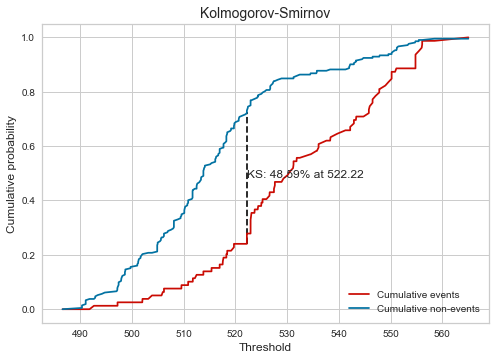

In [299]:
x_newtest.loc[:,"score"]= scorecard.score(x_newtest)

plot_ks(y_test, x_newtest.score)

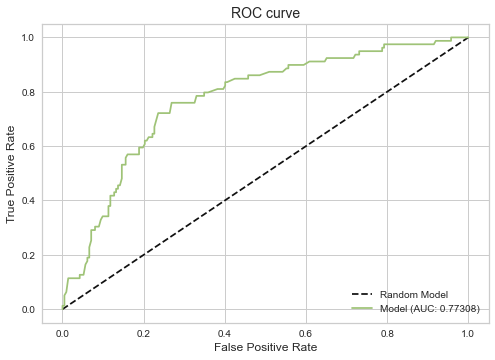

In [300]:
plot_auc_roc(y_test, x_newtest.score)

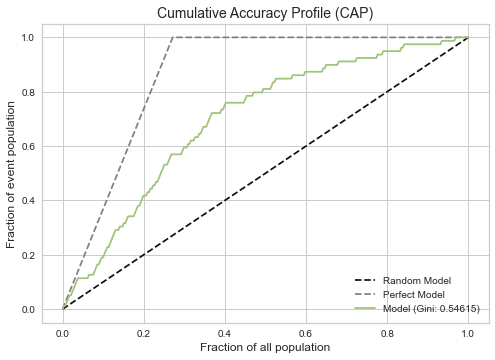

In [301]:
plot_cap(y_test, x_newtest.score)

In [302]:
x_newtest

,CHK_ACCT_0,CHK_ACCT_1,CHK_ACCT_2,DURATION_11,DURATION_11_15,DURATION_15_24,USED_CAR_1,SAV_ACCT_0,EMPLOYMENT>4,MALE_SINGLE_1,GUARANTOR_1,OTHER_INSTALL_1,FOREIGN_1,OWN_RES_1,score
933,0,0,0,0,0,0,0,0,1,1,0,1,0,1,513.819996
279,0,1,0,0,1,0,0,1,0,0,1,0,0,1,518.028454
14,1,0,0,0,0,0,0,1,0,0,0,0,0,0,554.809409
681,0,0,1,0,0,0,0,0,1,0,0,0,0,0,513.952603
458,0,0,0,1,0,0,0,0,0,1,0,0,0,1,490.359977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0,0,0,0,0,0,0,1,1,1,0,0,0,1,511.727547
20,1,0,0,1,0,0,0,0,0,1,0,0,0,0,528.204624
877,0,0,0,0,0,0,0,1,1,1,0,0,0,1,511.727547
350,0,1,0,0,0,1,0,0,0,1,0,0,0,0,524.988310
